In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description:

The main goal of this project is to examine the sales data from a retail store and develop a regression model that can accurately forecast future sales. The dataset utilized for this project is sourced from a diverse retail store that offers a wide range of products, including food, clothing, electronics, and home appliances. By analyzing this data and constructing a robust regression model, the project aims to provide valuable insights into anticipated sales patterns, assisting the store in making informed business decisions.



## Notebook overview

**File Descriptions and Data Field Information**

train.csv

-   The training data, comprising time series of features store_nbr, family, 
    and onpromotion as well as the target sales.

-   **store_nbr** identifies the store at which the products are sold.

-   **family** identifies the type of product sold.

-   **sales** gives the total sales for a product family at a particular store
    at a given date. Fractional values are possible since products can be sold in 
    fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

-   **onpromotion** gives the total number of items in a product family that
    were being promoted at a store at a given date.

test.csv

-   The test data, having the same features as the training data. You will predict the target sales for the dates in this file.

-   The dates in the test data are for the 15 days after the last date in the training data.

transaction.csv

-   Contains date, store_nbr and transaction made on that specific date.

sample_submission.csv

-   A sample submission file in the correct format.

stores.csv

-   Store metadata, including city, state, type, and cluster.

-   cluster is a grouping of similar stores.

oil.csv

-   **Daily oil price** which includes values during both the train and
     test data timeframes. (Ecuador is an oil-dependent country and its
     economical health is highly vulnerable to shocks in oil prices.)

holidays_events.csv

-   Holidays and Events, with metadata

> **NOTE**: Pay special attention to the transferred column. A holiday
> that is transferred officially falls on that calendar day but was
> moved to another date by the government. A transferred day is more
> like a normal day than a holiday. To find the day that it was
> celebrated, look for the corresponding row where type is **Transfer**.
>
> For example, the holiday Independencia de Guayaquil was transferred
> from 2012-10-09 to 2012-10-12, which means it was celebrated on
> 2012-10-12. Days that are type **Bridge** are extra days that are
> added to a holiday (e.g., to extend the break across a long weekend).
> These are frequently made up by the type **Work Day** which is a day
> not normally scheduled for work (e.g., Saturday) that is meant to
> payback the Bridge.
-   Additional holidays are days added a regular calendar holiday, for
    example, as typically happens around Christmas (making Christmas
    Eve a holiday).

**Additional Notes**

-   Wages in the public sector are paid every two weeks on the 15th and
    on the last day of the month. Supermarket sales could be affected
    by this.

-   A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People
    rallied in relief efforts donating water and other first need
    products which greatly affected supermarket sales for several
    weeks after the earthquake.


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [3]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [4]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV



from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import pearsonr

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle
from category_encoders.binary import BinaryEncoder

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [5]:
# For CSV, use pandas.read_csv
#train = pd.read_csv('./dataset/train.csv')
#test = pd.read_csv('./dataset/test.csv')
#transaction = pd.read_csv('./dataset/transactions.csv')
#oil = pd.read_csv('./dataset/oil.csv')
#holidays_events = pd.read_csv('./dataset/holidays_events.csv')
#stores = pd.read_csv('./dataset/stores.csv')

test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP2/test.csv')
stores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP2/stores.csv')

sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP2/sample_submission.csv')

holidays_events = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP2/holidays_events.csv')

oil = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP2/oil.csv')

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP2/train.csv')

transaction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP2/transactions.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Train

In [6]:
# In time series forecasting, dates must be in the datetime format
train["date"] = pd.to_datetime(train.date)
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
train.shape

(3000888, 6)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [9]:
train.isnull().sum()


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [10]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [11]:
train.corr(numeric_only=True)

,id,store_nbr,sales,onpromotion
id,1.000000,0.000301,0.085784,0.206260
store_nbr,0.000301,1.000000,0.041196,0.007286
sales,0.085784,0.041196,1.000000,0.427923
onpromotion,0.206260,0.007286,0.427923,1.000000


## Test

In [12]:
# In time series forecasting, dates must be in the datetime format
test["date"] = pd.to_datetime(test.date)
test.head(10)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
5,3000893,2017-08-16,1,BREAD/BAKERY,12
6,3000894,2017-08-16,1,CELEBRATION,0
7,3000895,2017-08-16,1,CLEANING,25
8,3000896,2017-08-16,1,DAIRY,45
9,3000897,2017-08-16,1,DELI,18


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [14]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

## Transaction

In [15]:
transaction['date']=pd.to_datetime(transaction.date)
transaction

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [16]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [17]:
transaction.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

## Stores

In [18]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [19]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [20]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

## Oil

In [21]:
oil['date']=pd.to_datetime(oil.date)
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [22]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [23]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [24]:
oil['dcoilwtico'].fillna(method='backfill',inplace=True)

In [25]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

## Holidays

In [26]:
holidays_events['date']=pd.to_datetime(holidays_events.date)
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [27]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [28]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

## MERGE

In [29]:
# combine the datasets on common columns

merged_data = pd.merge(train, transaction, on=['date', 'store_nbr'])


In [30]:
# Merge Holiday data to previous merged data on date column
merged_data2 = pd.merge(merged_data, holidays_events, on='date')


In [31]:
# Merge Oil data to previous merged data on date column
merged_data3 = pd.merge(merged_data2, oil, on='date')


In [32]:
# Merge Store data to previous merged data on store_nbr column

merged_data4 = pd.merge(merged_data3, stores, on='store_nbr')

In [33]:
# Preview Merged data
merged_data4.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1


In [34]:
# Rename columns using the rename method
new_merged_data = merged_data4.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

In [35]:
# Datatypes of new merged data
new_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   transactions  322047 non-null  int64         
 7   holiday_type  322047 non-null  object        
 8   locale        322047 non-null  object        
 9   locale_name   322047 non-null  object        
 10  description   322047 non-null  object        
 11  transferred   322047 non-null  bool          
 12  dcoilwtico    322047 non-null  float64       
 13  city          322047 non-null  object        
 14  state         322047 non-null  object        
 15  store_type    322

In [36]:
# Inspect data for null values
new_merged_data.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
transactions    0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
city            0
state           0
store_type      0
cluster         0
dtype: int64

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

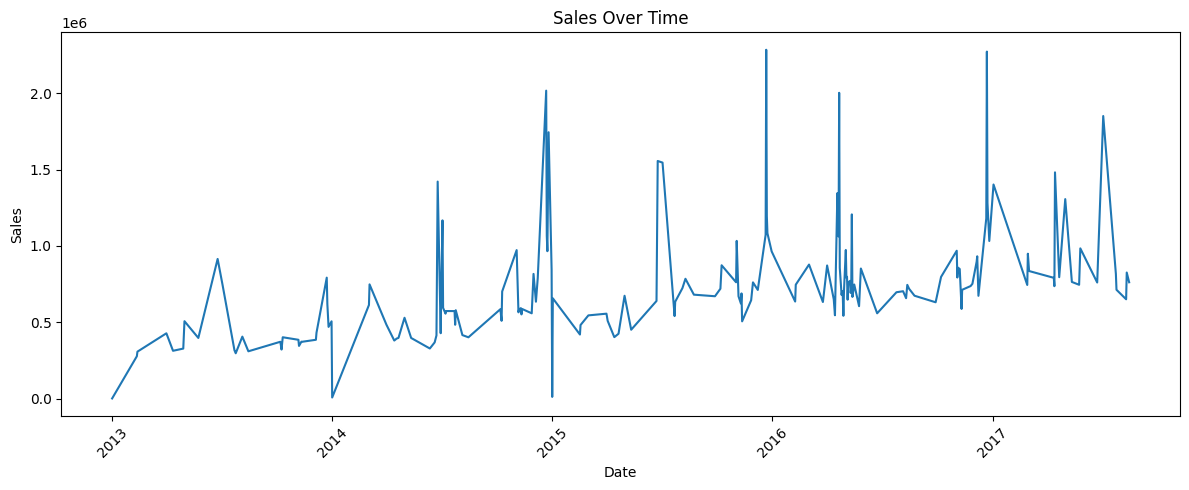

In [37]:
##sales over time
train["date"] = pd.to_datetime(train.date)
# Group data by date and sum the sales
date_group = new_merged_data.groupby("date").sum(numeric_only=True)

# Plot the sales over time
plt.figure(figsize=(12,5))
plt.plot(date_group.index, date_group["sales"])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### How many stores are in the states?

In [38]:
#stores grouped by States
stores.state.value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

Text(0.5, 0, 'Count')

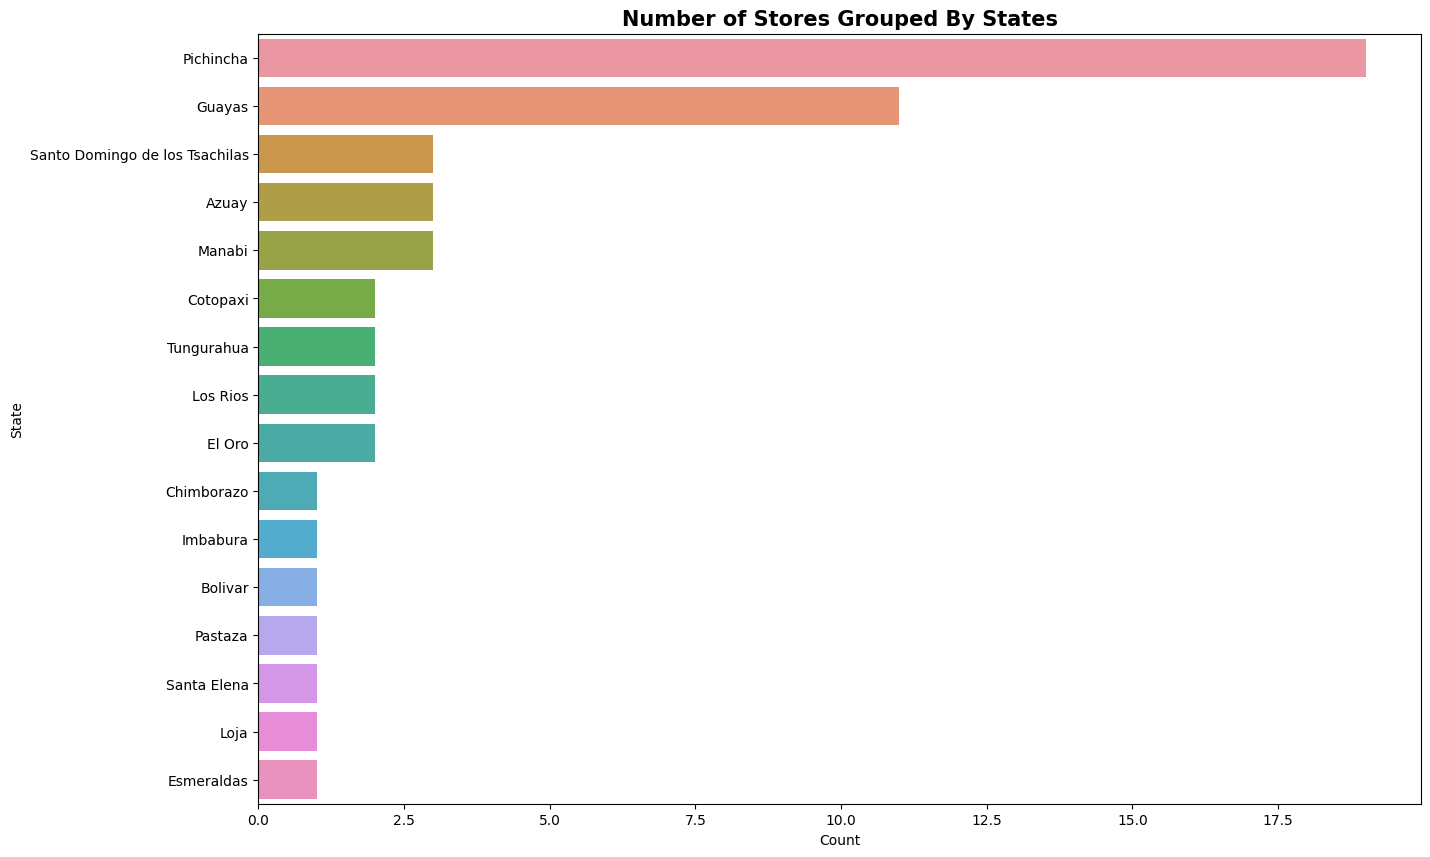

In [39]:
# Visualization of Store States
plt.figure(figsize=(15, 10))
sns.countplot(data=stores, y='state',order=stores.state.value_counts().index)
plt.title('Number of Stores Grouped By States',fontweight="bold",fontsize=15)
plt.ylabel('State')
plt.xlabel('Count')

### How many stores are in the cities

In [40]:

#Stores grouped by Cities
stores.city.value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

Text(0.5, 0, 'Count')

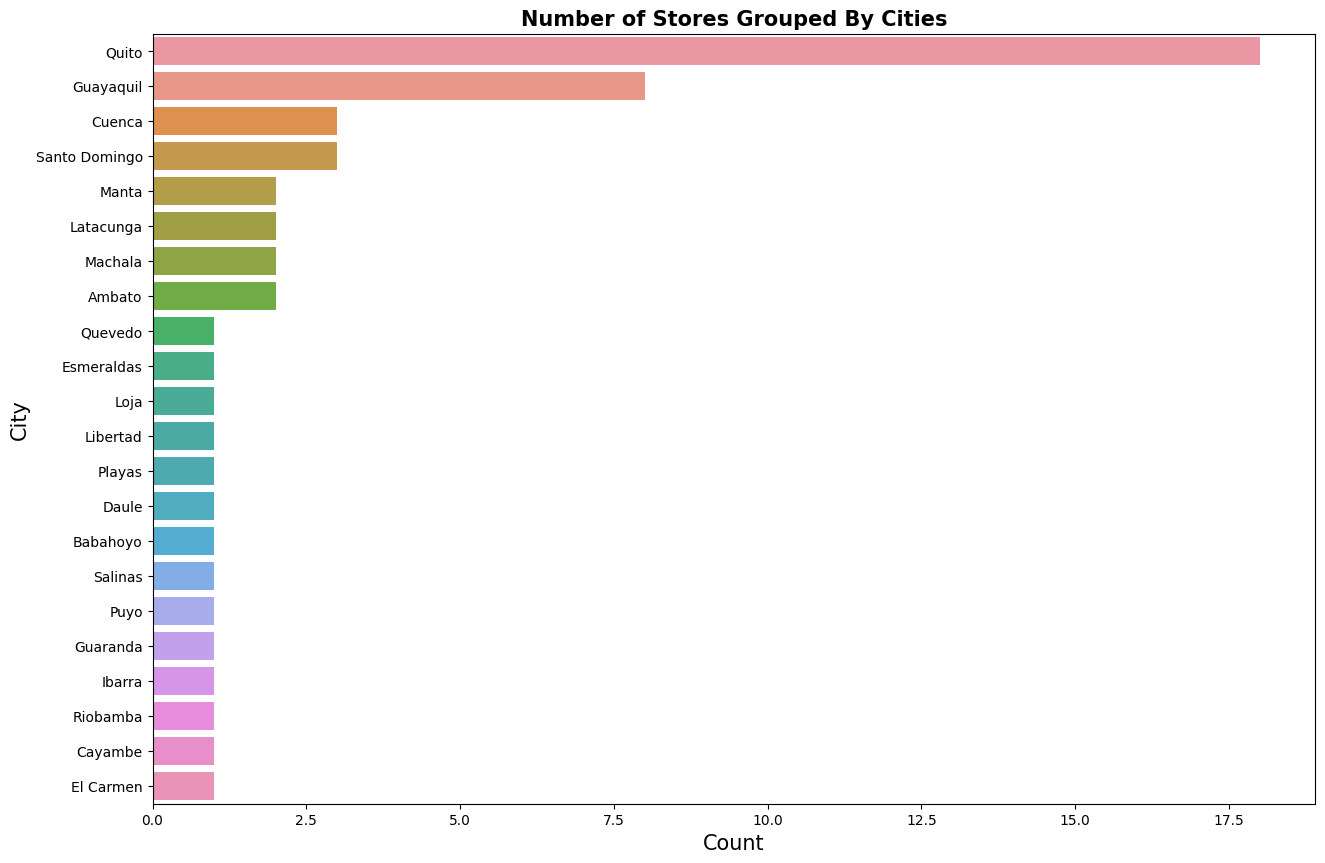

In [41]:
# Visualization of Store by cities
plt.figure(figsize=(15, 10))
sns.countplot(data=stores, y='city', 
              order=stores.city.value_counts().index)
plt.title('Number of Stores Grouped By Cities',fontweight="bold",fontsize=15)
plt.ylabel('City', fontsize=15)
plt.xlabel('Count', fontsize=15)

## Sales made by each store from 2013 to 2017

In [42]:
stnbr=new_merged_data.groupby('store_nbr').sum('sales').reset_index()
stnbr.drop(['id','onpromotion','transactions','transferred','dcoilwtico','cluster'], axis=1)

,store_nbr,sales
0,1,1.762220e+06
1,2,2.831383e+06
2,3,5.985505e+06
3,4,2.224350e+06
4,5,1.896103e+06
5,6,2.974784e+06
6,7,3.345915e+06
7,8,3.571102e+06
8,9,3.141671e+06
9,10,1.149936e+06


[Text(0.5, 1.0, 'Total Sales by Stores')]

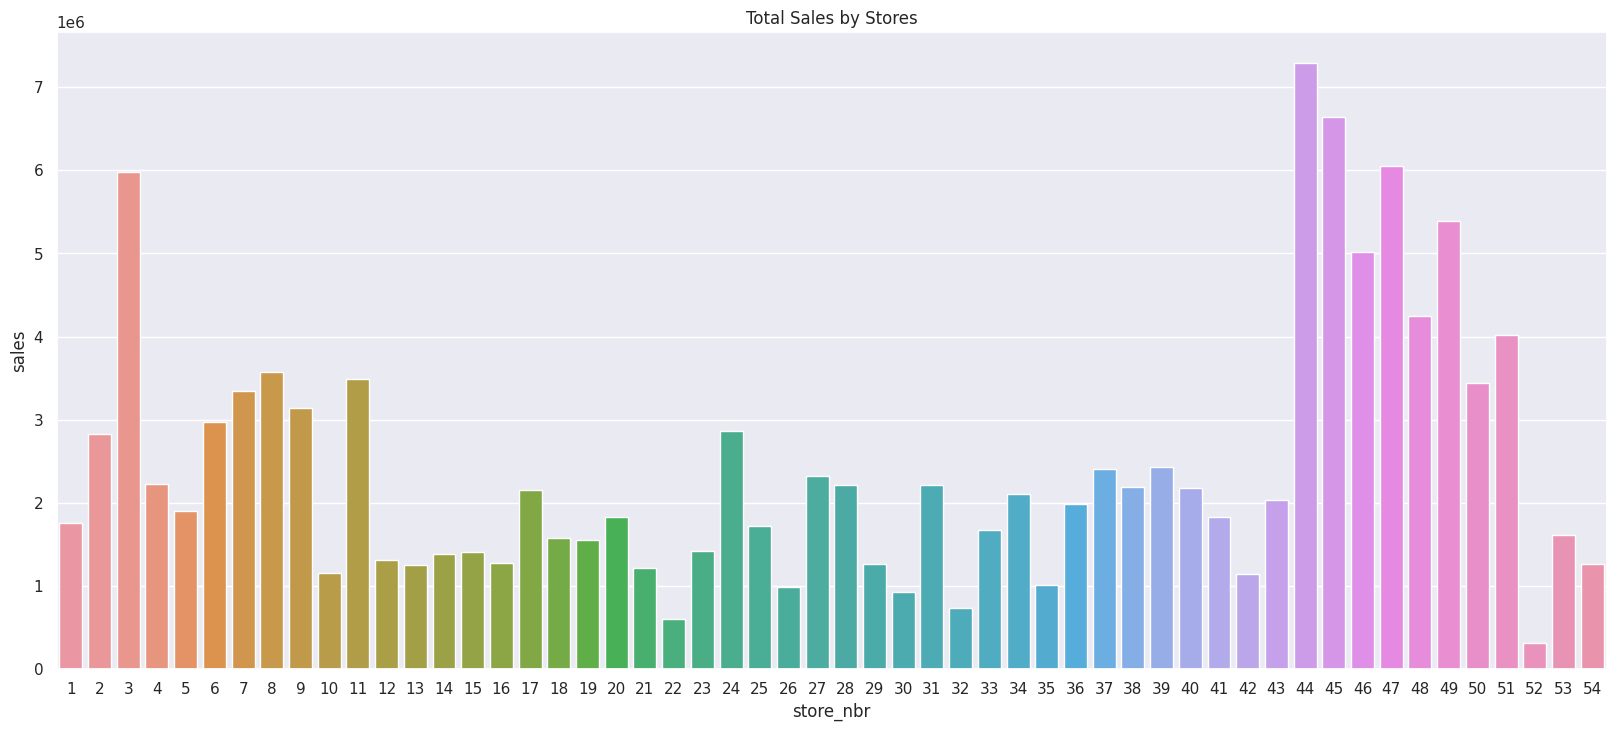

In [43]:

sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'sales',data =stnbr).set(title='Total Sales by Stores')

In [44]:
#Convert date column to string
train['date']=train['date'].astype(str)
#Grouping by year 2017 and sales descending
Y2017 = train[train['date'].str.contains('2017')].sort_values(by='sales', ascending=False)
Y2017[['date','sales']].head()

,date,sales
2760297,2017-04-02,38422.625
2872134,2017-06-04,24744.000
2758086,2017-04-01,24394.000
2758020,2017-04-01,24134.000
2599488,2017-01-02,23966.000


In [45]:
#Grouping by year 2016 and sales descending
Y2016 = train[train['date'].str.contains('2016')].sort_values(by='sales', ascending=False)
Y2016[['date','sales']].head()

,date,sales
2163723,2016-05-02,124717.000
2445984,2016-10-07,89576.360
2144154,2016-04-21,87438.516
2139699,2016-04-18,76090.000
2153031,2016-04-26,63434.000


In [46]:
#Grouping by year 2015 and sales descending
Y2015 = train[train['date'].str.contains('2015')].sort_values(by='sales', ascending=False)
Y2015[['date','sales']].head()

,date,sales
1916586,2015-12-14,40351.46
1898370,2015-12-04,35828.00
1923384,2015-12-18,34454.00
1857219,2015-11-11,33274.00
1929456,2015-12-21,25238.00


In [47]:
#Grouping by year 2014 and sales descending
Y2014 = train[train['date'].str.contains('2014')].sort_values(by='sales', ascending=False)
Y2014[['date','sales']].head()

,date,sales
1257246,2014-12-08,45361.000
1271832,2014-12-16,37106.000
1269390,2014-12-15,32209.000
1283844,2014-12-23,31851.158
1261635,2014-12-10,31375.500


In [48]:
#Grouping by year 2013 and sales descending
Y2013 = train[train['date'].str.contains('2013')].sort_values(by='sales', ascending=False)
Y2013[['date','sales']].head()

,date,sales
562596,2013-11-12,46271.0
79674,2013-02-14,26067.0
598236,2013-12-02,22534.0
629949,2013-12-20,22125.0
553686,2013-11-07,22024.0


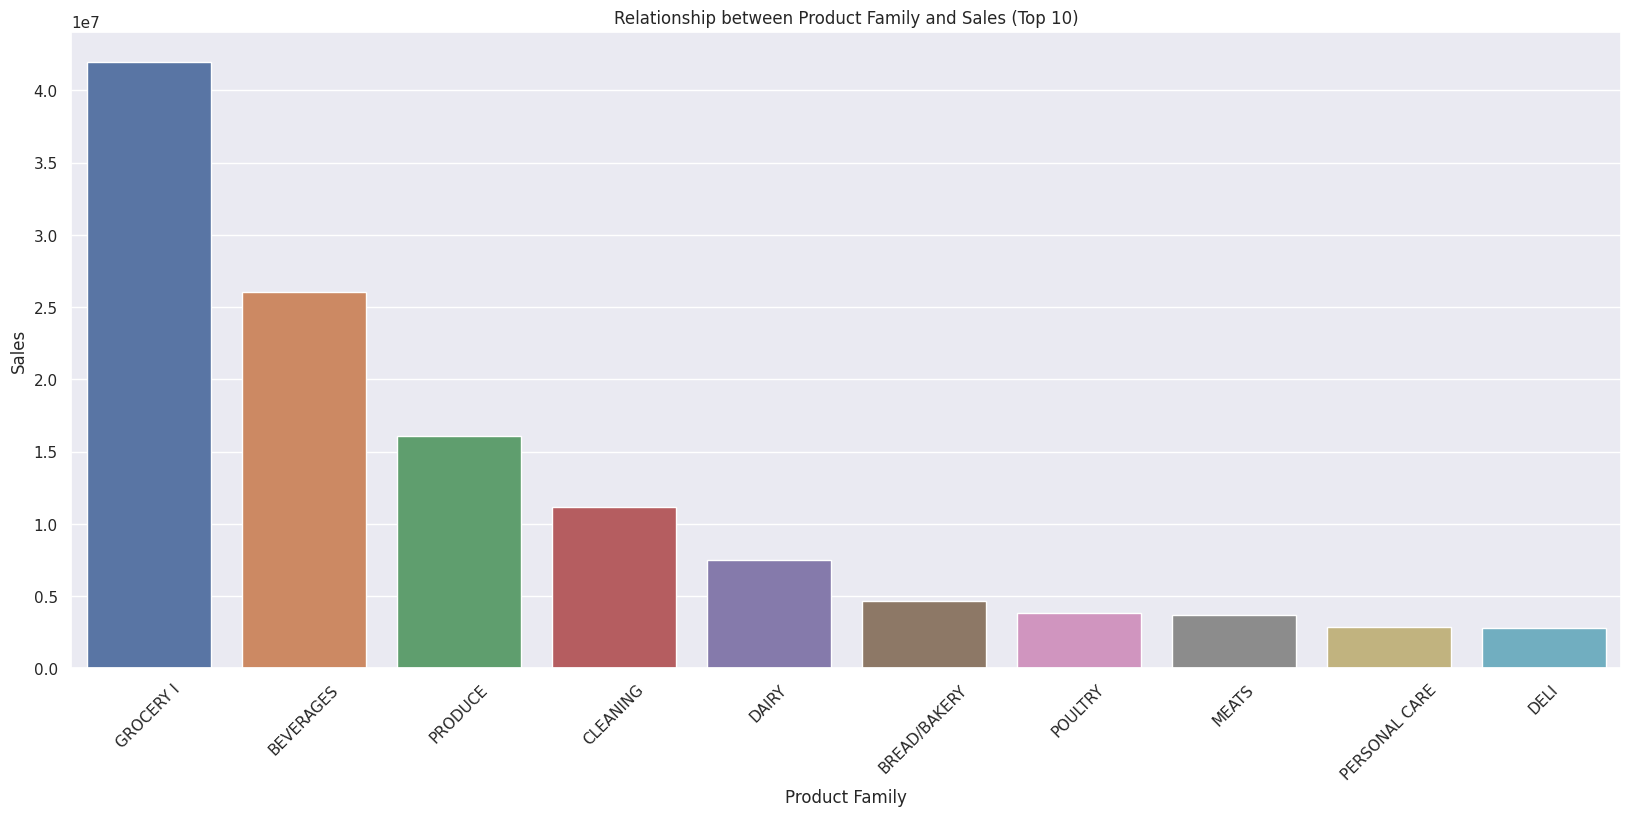

In [49]:

# Group data by product family and sum the sales
grouped_data_1 = new_merged_data.groupby('family').sum(numeric_only=True)['sales']

# Sort the data by sales
grouped_data_1 = grouped_data_1.sort_values(ascending=False)

# Plot the top 10 product families
sns.barplot(x=grouped_data_1.index[:10], y=grouped_data_1.values[:10])

# Add labels and title
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.title('Relationship between Product Family and Sales (Top 10)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

In [50]:

corr = new_merged_data.corr(numeric_only=True)
corr

,id,store_nbr,sales,onpromotion,transactions,transferred,dcoilwtico,cluster
id,1.000000,0.013728,0.061237,0.181707,-0.018267,0.133468,-0.827884,-0.018880
store_nbr,0.013728,1.000000,0.051349,0.025992,0.171946,0.001440,-0.010132,-0.075667
sales,0.061237,0.051349,1.000000,0.418029,0.203691,-0.007167,-0.061509,0.033868
onpromotion,0.181707,0.025992,0.418029,1.000000,0.038163,0.028325,-0.133598,0.005895
transactions,-0.018267,0.171946,0.203691,0.038163,1.000000,-0.043902,-0.016547,0.188876
transferred,0.133468,0.001440,-0.007167,0.028325,-0.043902,1.000000,-0.047398,-0.001880
dcoilwtico,-0.827884,-0.010132,-0.061509,-0.133598,-0.016547,-0.047398,1.000000,0.021238
cluster,-0.018880,-0.075667,0.033868,0.005895,0.188876,-0.001880,0.021238,1.000000


[Text(0.5, 1.0, 'Sales vs Transcations')]

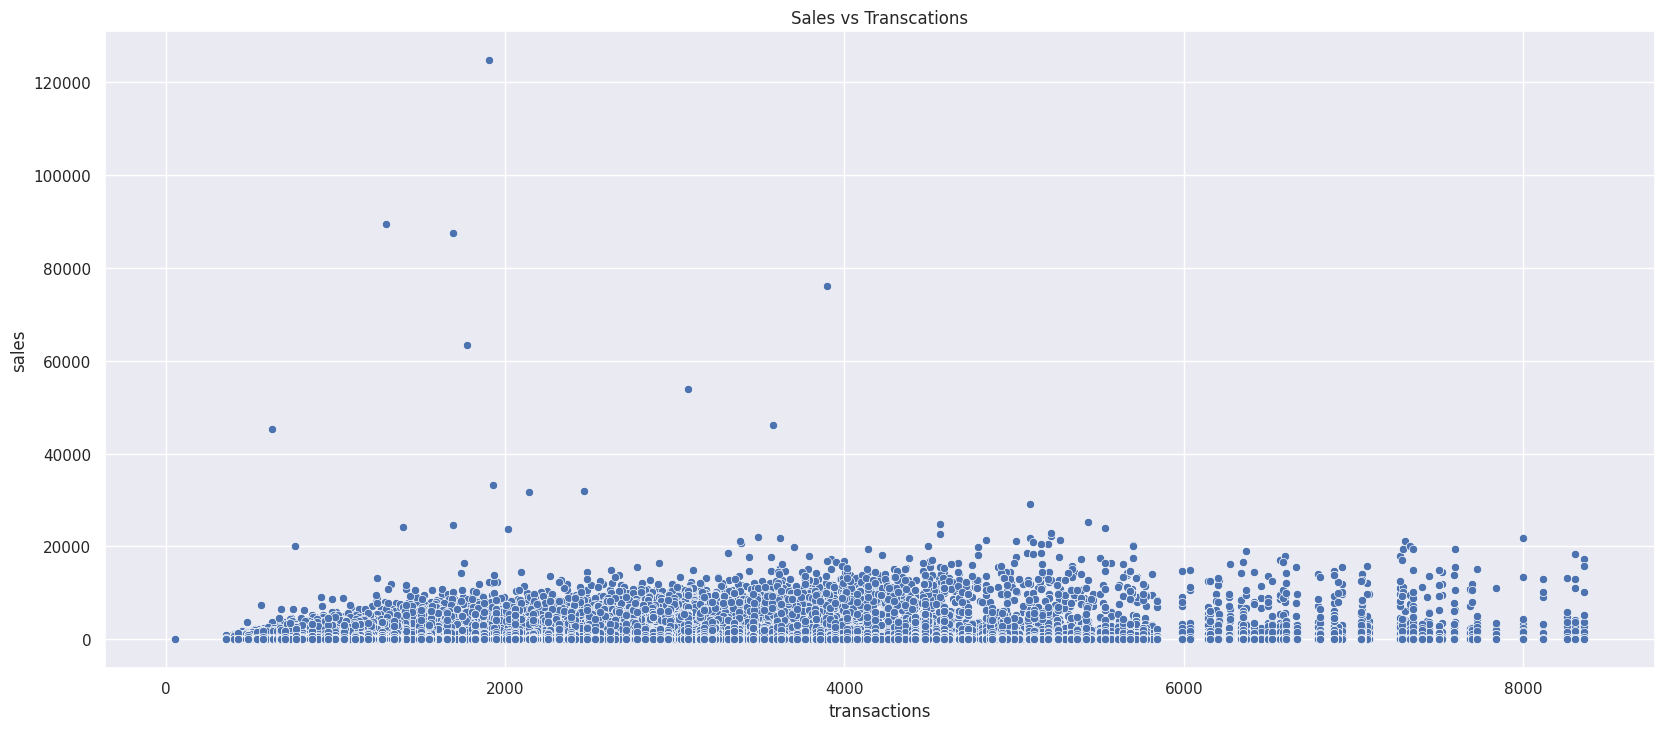

In [51]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.scatterplot(x = "transactions",y = 'sales',data = new_merged_data).set(title='Sales vs Transcations')

[Text(0.5, 1.0, 'Sales vs dcoilwtico')]

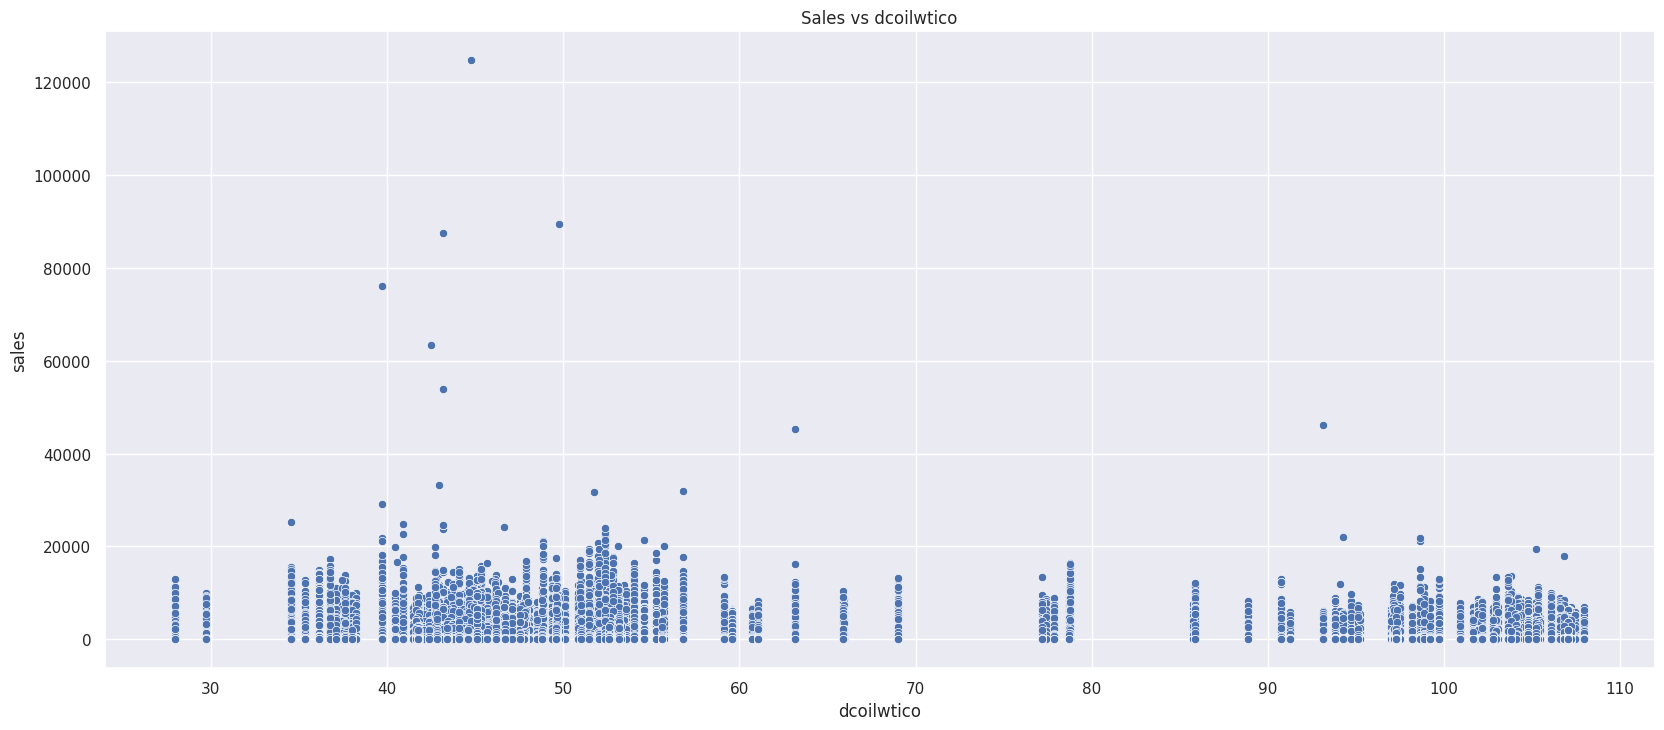

In [52]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.scatterplot(x = "dcoilwtico",y = 'sales',data = new_merged_data).set(title='Sales vs dcoilwtico')

[Text(0.5, 1.0, 'Sales vs Onpromotion')]

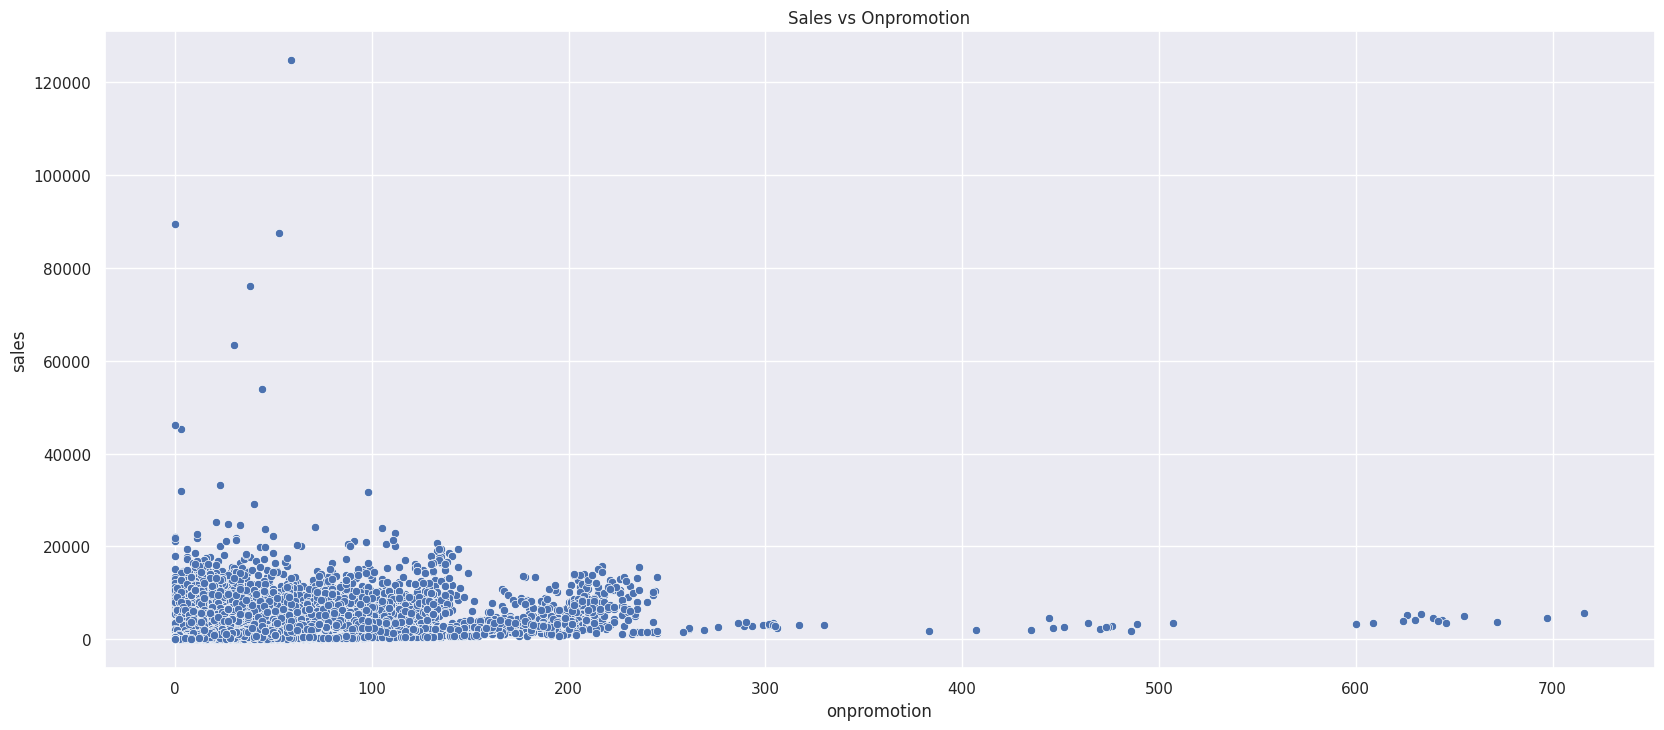

In [53]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.scatterplot(x = "onpromotion",y = 'sales',data = new_merged_data).set(title='Sales vs Onpromotion')

In [54]:
new_merged_data.to_parquet('train_data.parquet')
train1 = pd.read_parquet('train_data.parquet')
train1.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1


In [55]:
train1.rename(columns={'dcoilwtico':'oil_price'}, inplace=True)

In [56]:
train1.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,oil_price,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1


## Question 1: Is the train dataset complete? 

In [57]:
# Check for completeness
def check_completeness(df):
    """
    Checks the completeness of a dataframe.
    If the dataframe is complete,
    Returns "The dataframe is complete" with an empty list. 
    If otherwise, 
    Returns 'The dataframe is incomplete: 'and a list of column names that contain missing values in the dataframe.
    """
    if df.isnull().any().any():
      incomplete_cols = df.columns[df.isnull().any()].tolist()
      return 'The dataframe is incomplete: ', incomplete_cols
    else:
        return "The dataframe is complete."

In [58]:
check_completeness(train1)

'The dataframe is complete.'

## Question 2: Which dates have the lowest and highest sales for each year? 

In [59]:
train1['date']=pd.to_datetime(train1['date'])

In [60]:
sales_by_year=train1.groupby(train1['date'].dt.year)
for year, group in sales_by_year:
    min_sale_date=group.loc[group['sales'].idxmin()]['date']
    max_sale_date=group.loc[group['sales'].idxmax()]['date']
    print(f'Year: {year}, Date with lowest sales:{min_sale_date.date()}, Date with highest sales: {max_sale_date.date()}')

Year: 2013, Date with lowest sales:2013-01-01, Date with highest sales: 2013-11-12
Year: 2014, Date with lowest sales:2014-01-01, Date with highest sales: 2014-12-08
Year: 2015, Date with lowest sales:2015-01-01, Date with highest sales: 2015-11-11
Year: 2016, Date with lowest sales:2016-02-08, Date with highest sales: 2016-05-02
Year: 2017, Date with lowest sales:2017-01-02, Date with highest sales: 2017-01-02


In [61]:
sales_by_year=train1.groupby(train1['date'].dt.year)
for year, group in sales_by_year:
    min_sale=group['sales'].min()
    max_sale=group['sales'].max()
    print(f'Year: {year}, Lowest sales:{min_sale}, Highest sales:{max_sale}')

Year: 2013, Lowest sales:0.0, Highest sales:46271.0
Year: 2014, Lowest sales:0.0, Highest sales:45361.0
Year: 2015, Lowest sales:0.0, Highest sales:33274.0
Year: 2016, Lowest sales:0.0, Highest sales:124717.0
Year: 2017, Lowest sales:0.0, Highest sales:23966.0


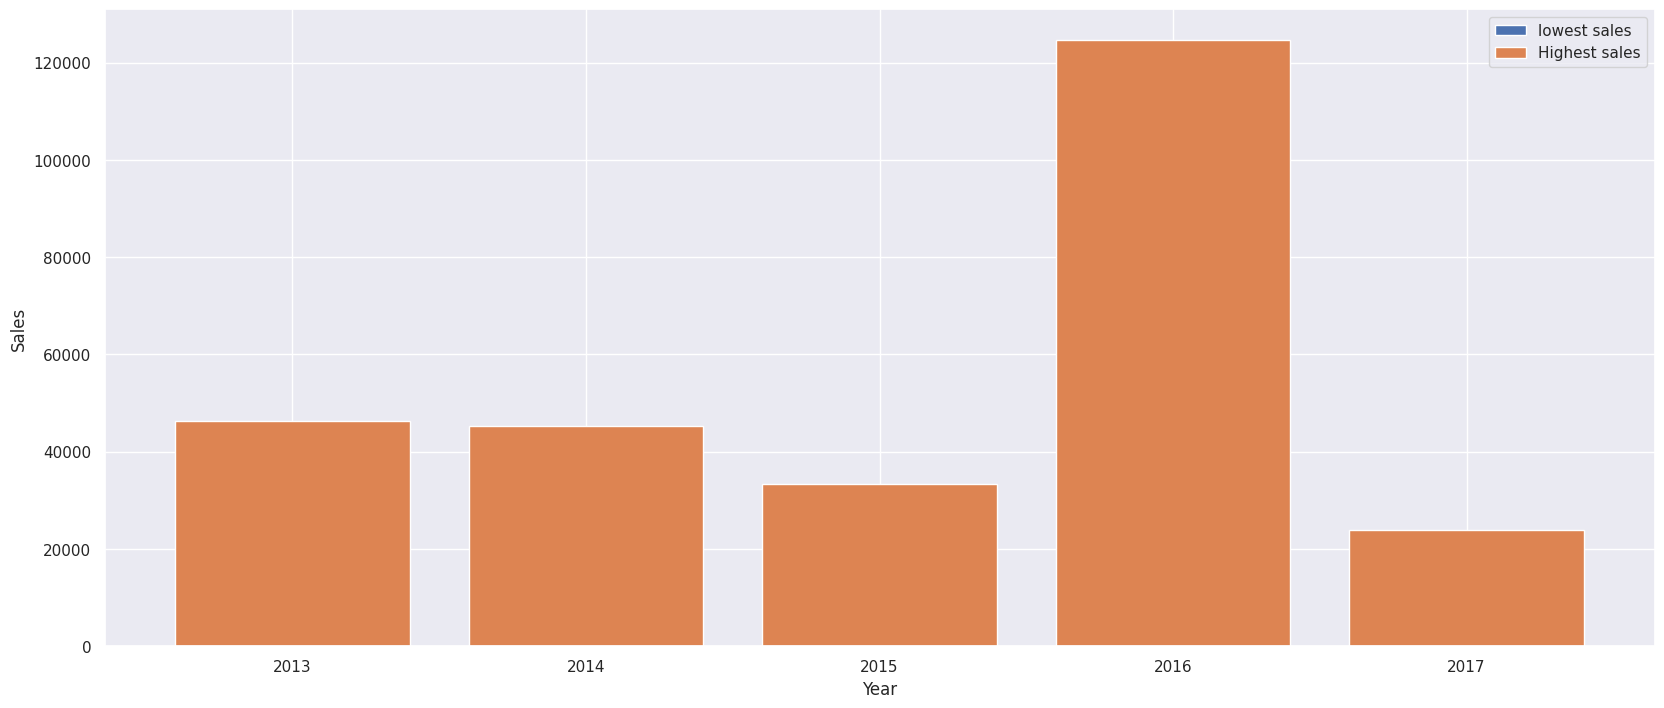

In [62]:
train1['date']=pd.to_datetime(train1['date']).dt.year
                                                              
#Group the sales data by year and find the year with the lowest sales 
min_sales_year=train1.groupby('date')['sales'].idxmin()

#Group the sales data by year and find the year with the highest sales 
max_sales_year=train1.groupby('date')['sales'].idxmax()

#plot the results using a bar chart
fig, ax=plt.subplots()
ax.bar(min_sales_year.index, train1.loc[min_sales_year]['sales'],label='lowest sales')
ax.bar(max_sales_year.index, train1.loc[max_sales_year]['sales'],label='Highest sales')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Sales')

plt.show()

# Question 3: Are certain groups of stores selling more products?

In [63]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


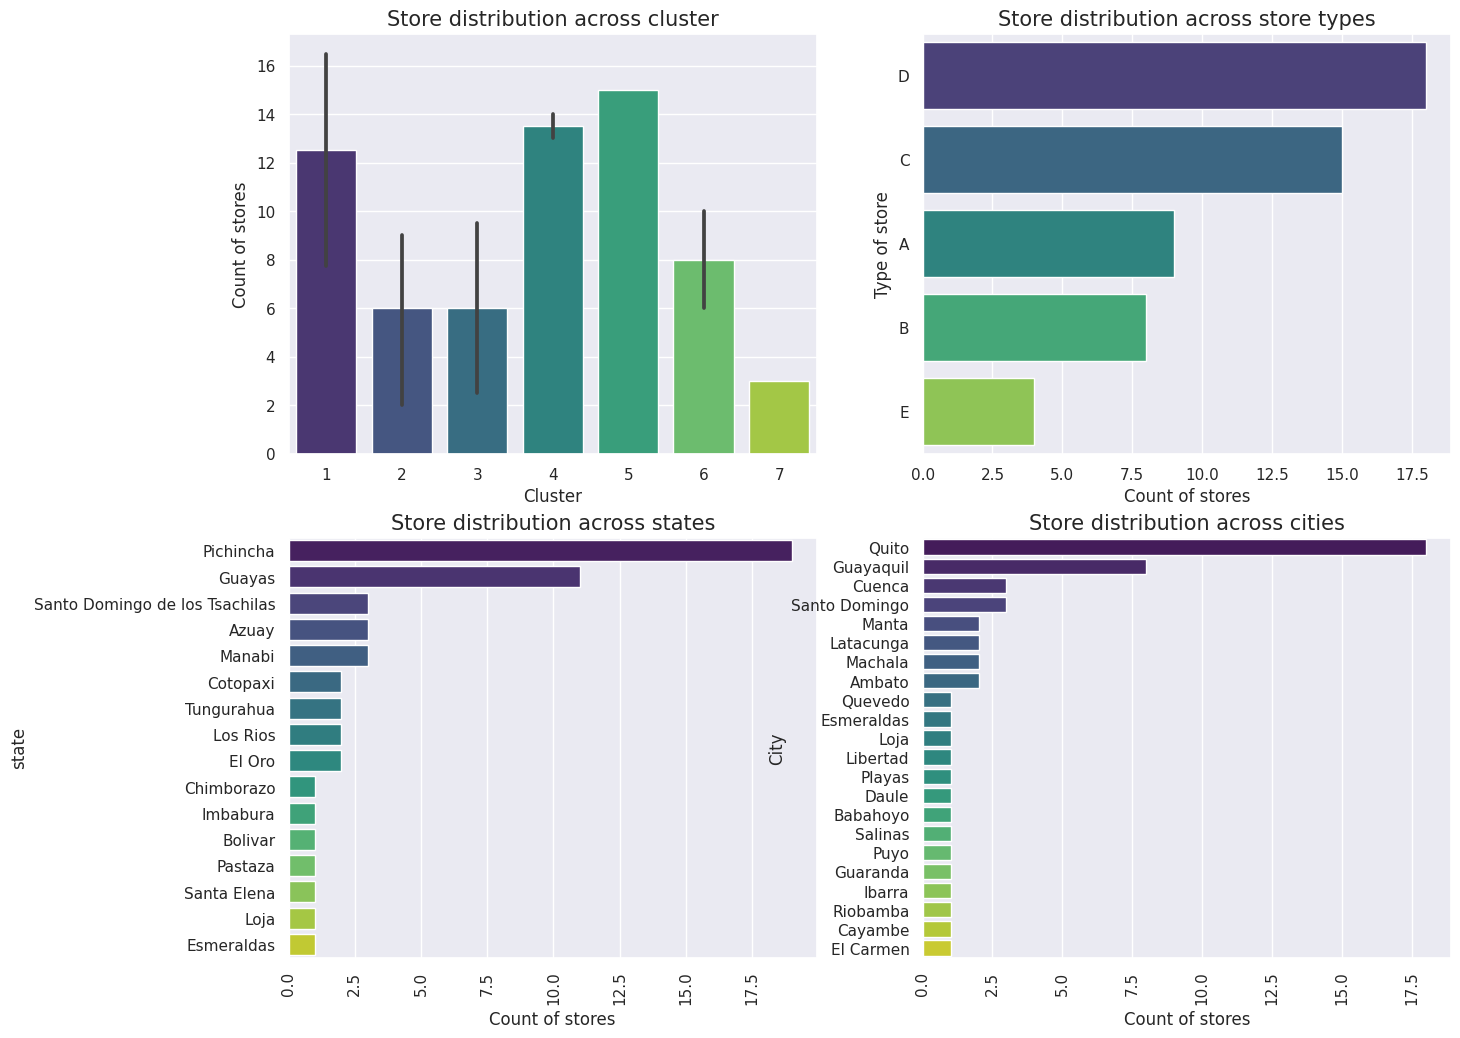

In [64]:
#Count of stores in different types and clusters
plt.figure(figsize=(15,12))
#row col plotnumber - 121
plt.subplot(221)
# Count of stores for each type 
temp = stores['cluster'].value_counts()
#plot
sns.barplot(y=temp.index,x=temp.values, palette="viridis")
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.title('Store distribution across cluster', fontsize=15)

plt.subplot(222)
# Count of stores for each type 
temp = stores['type'].value_counts()
#plot
sns.barplot(y=temp.index,x=temp.values, palette="viridis")
plt.xlabel('Count of stores', fontsize=12)
plt.ylabel('Type of store', fontsize=12)
plt.title('Store distribution across store types', fontsize=15)

plt.subplot(223)
# Count of stores for each type 
temp = stores['state'].value_counts()
#plot
sns.barplot(y=temp.index,x=temp.values, palette="viridis")
plt.xlabel('Count of stores', fontsize=12)
plt.ylabel('state', fontsize=12)
plt.title('Store distribution across states', fontsize=15)
plt.xticks(rotation='vertical')

plt.subplot(224)
# Count of stores for each type 
temp = stores['city'].value_counts()
#plot
sns.barplot(y=temp.index,x=temp.values, palette="viridis")
plt.xlabel('Count of stores', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Store distribution across cities', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-65-66546c8bdad7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=train1['cluster'], y=train1['sales'], palette="viridis")


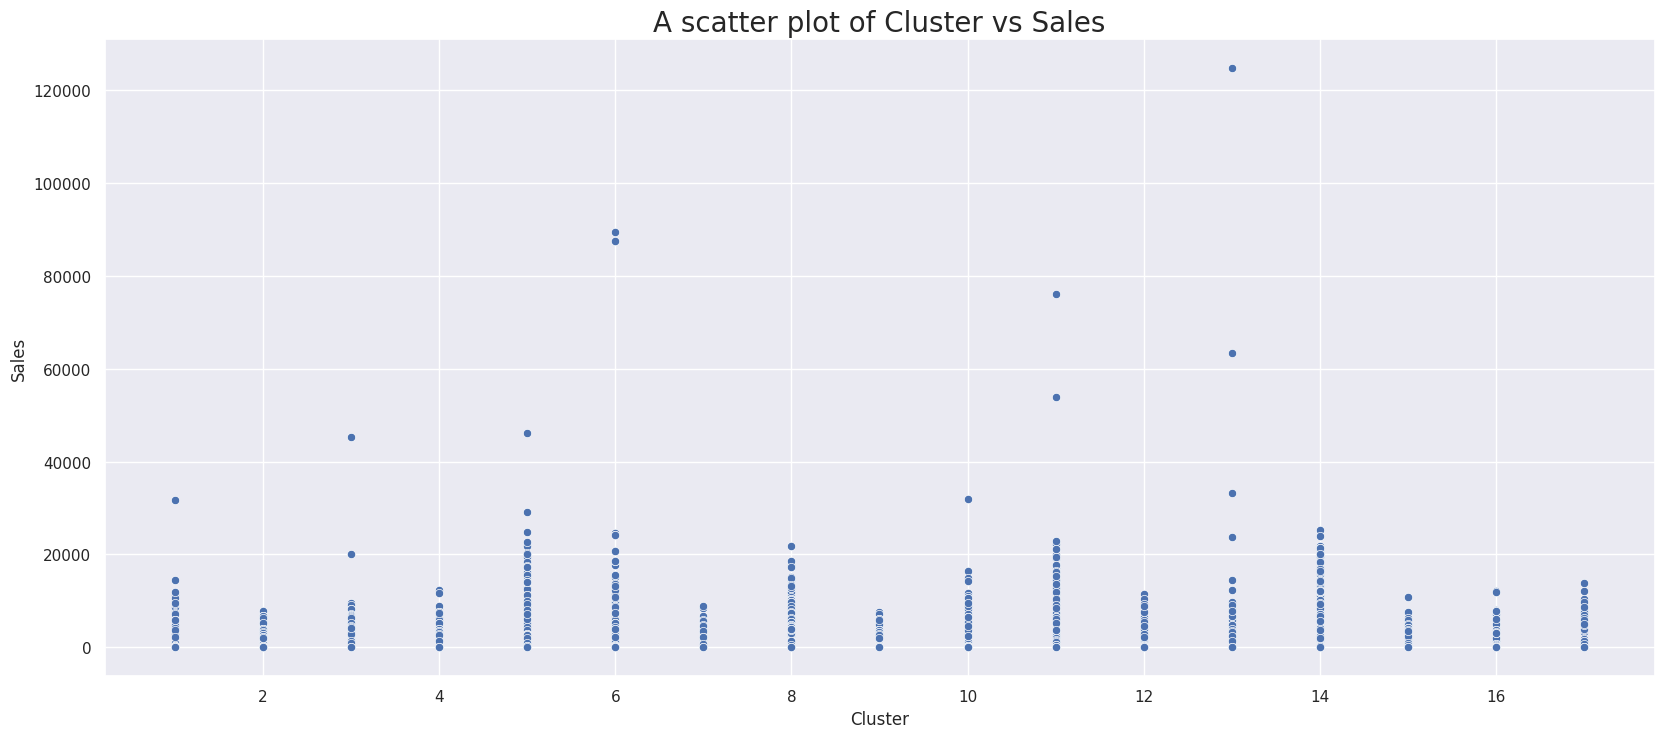

In [65]:
sns.scatterplot(x=train1['cluster'], y=train1['sales'], palette="viridis")
plt.xlabel('Cluster')
plt.ylabel('Sales')
plt.title('A scatter plot of Cluster vs Sales', fontsize=20)
plt.show()

<ipython-input-66-4865e29a4bfb>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=train1['city'], y=train1['sales'], palette="viridis")


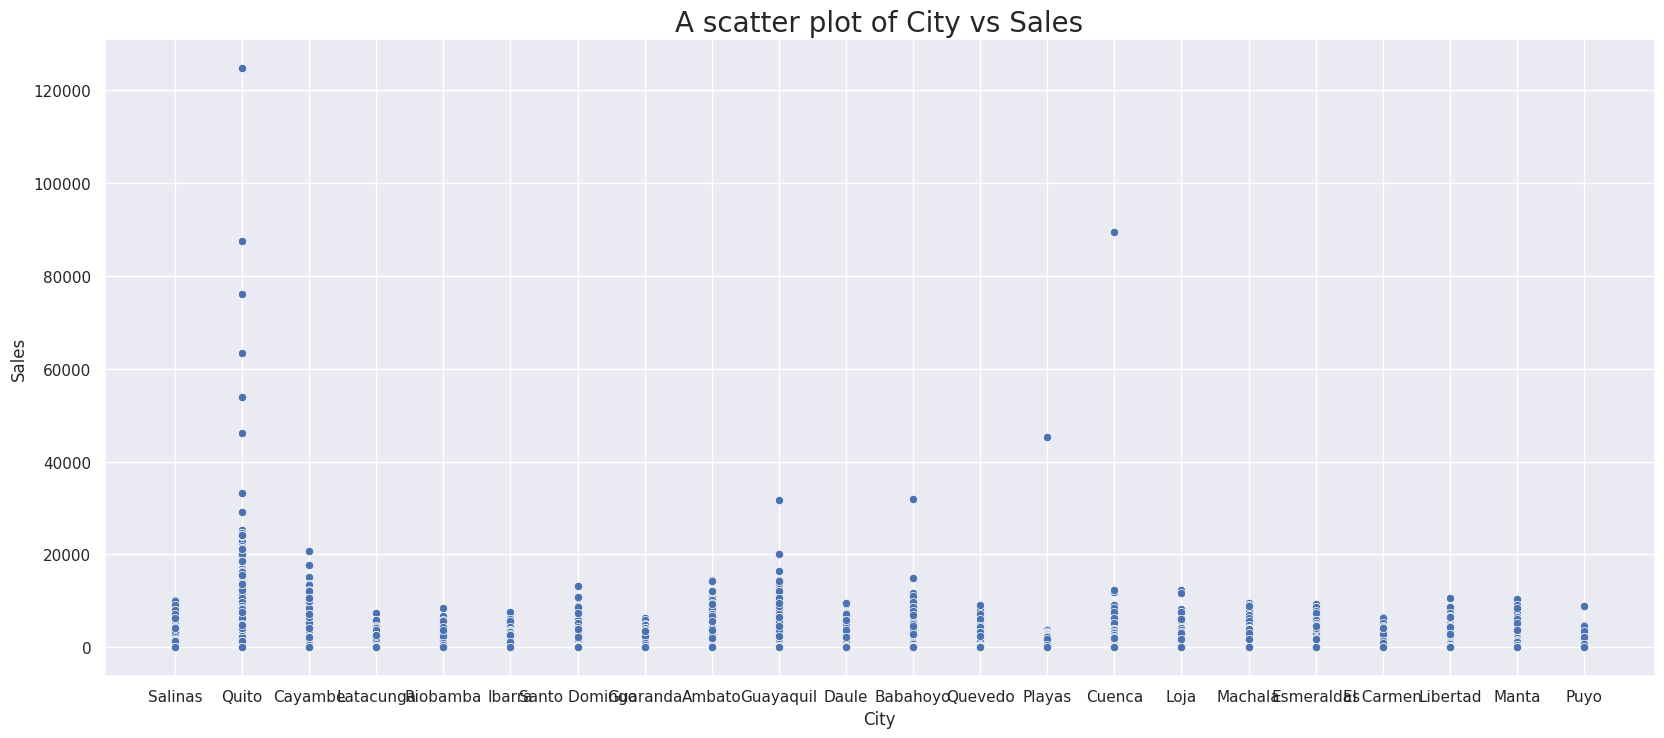

In [66]:
sns.scatterplot(x=train1['city'], y=train1['sales'], palette="viridis")
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('A scatter plot of City vs Sales', fontsize=20)
plt.show()

<ipython-input-67-5fd064874def>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=train1['store_type'], y=train1['sales'], palette="viridis")


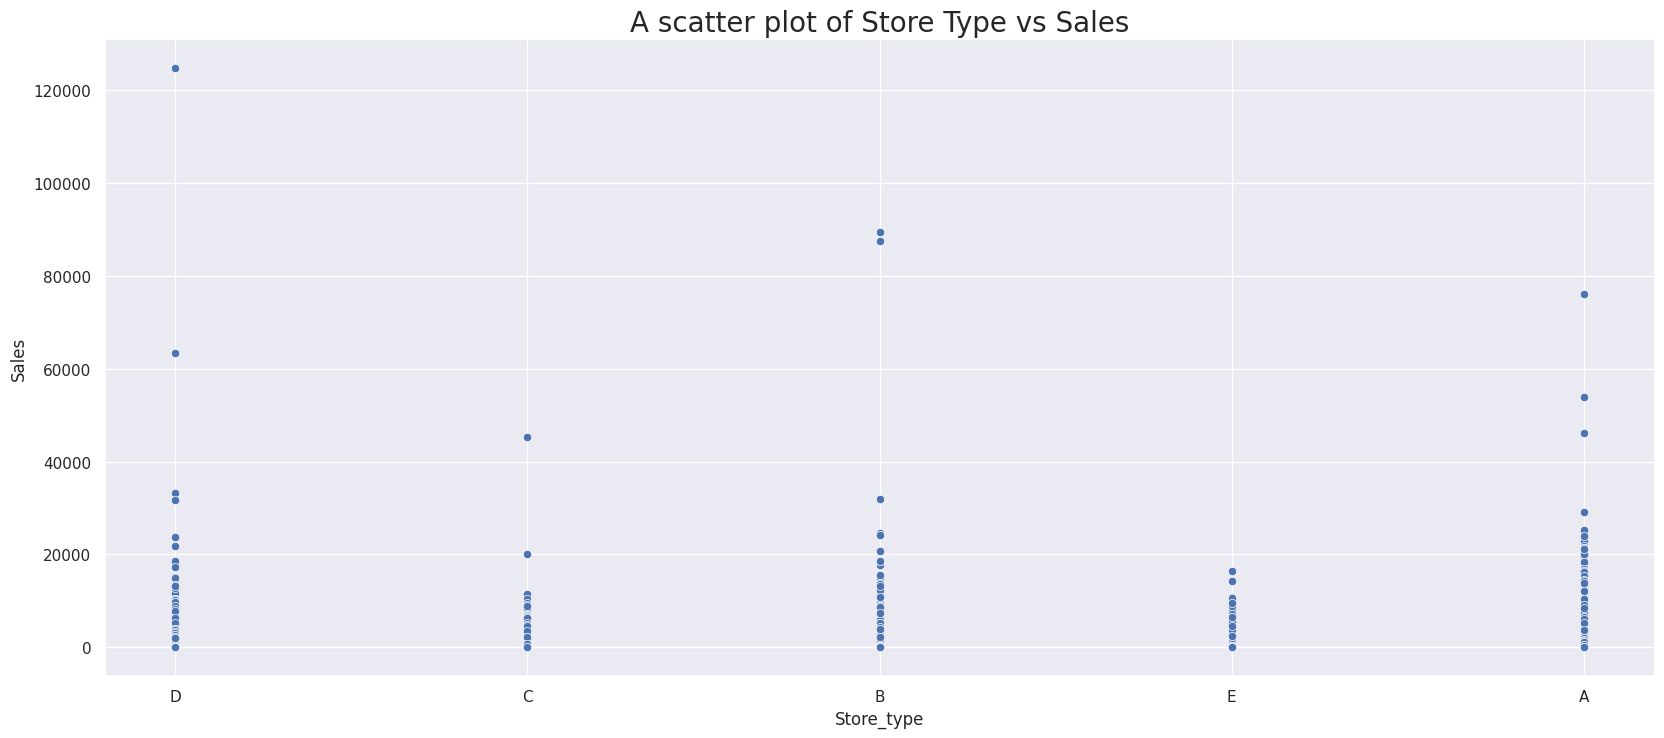

In [67]:
sns.scatterplot(x=train1['store_type'], y=train1['sales'], palette="viridis")
plt.xlabel('Store_type')
plt.ylabel('Sales')
plt.title('A scatter plot of Store Type vs Sales', fontsize=20)
plt.show()

<ipython-input-68-0a014e970065>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=train1['state'], y=train1['sales'], palette="viridis")


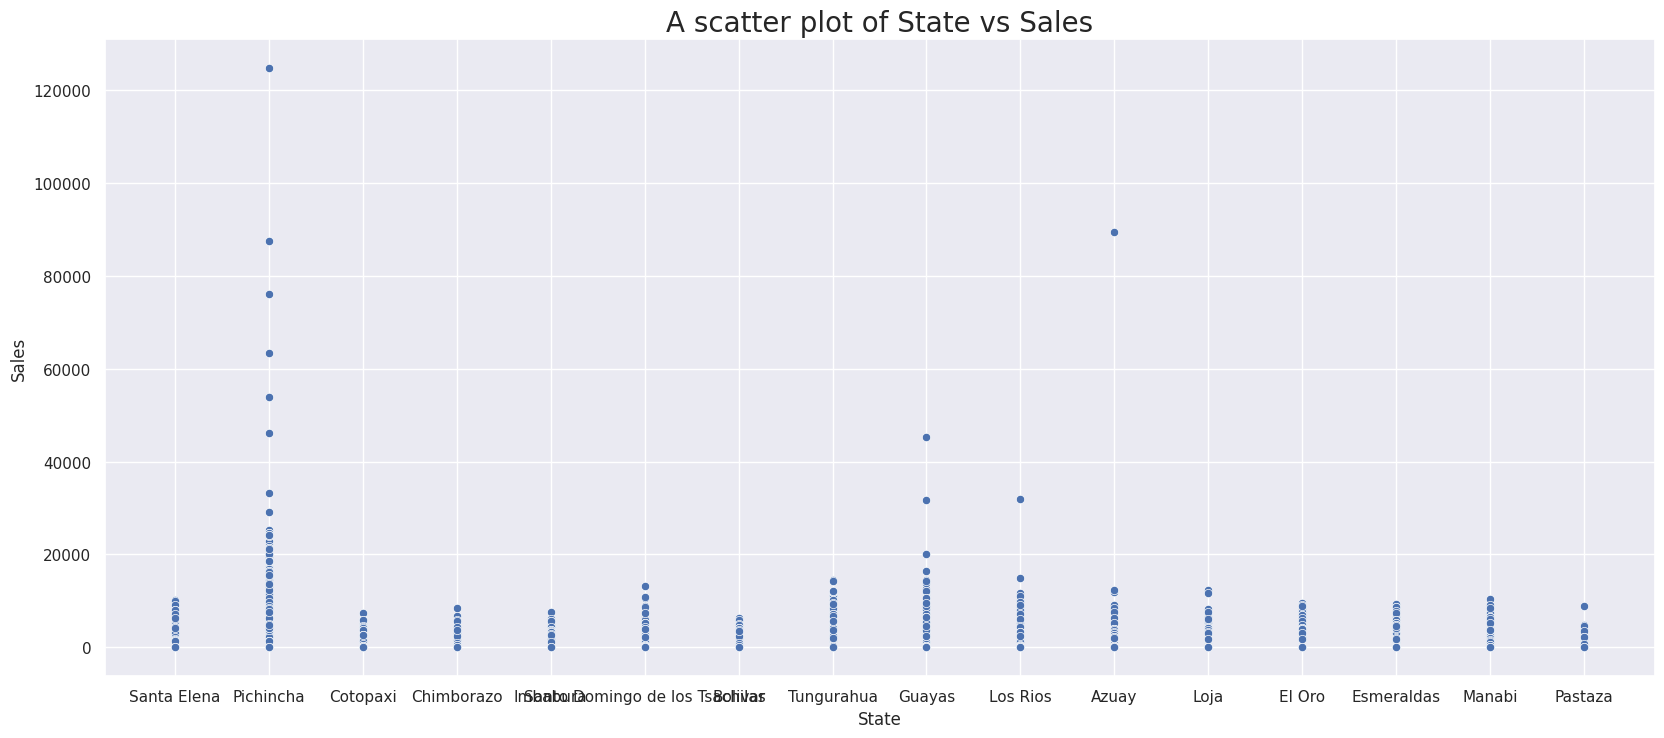

In [68]:
sns.scatterplot(x=train1['state'], y=train1['sales'], palette="viridis")
#plot  
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('A scatter plot of State vs Sales', fontsize=20)
plt.show()

# Question 4: Are sales affected by promotions, oil prices and holidays?

<ipython-input-69-0c9a8a1b16bf>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=train1['onpromotion'], y=train1['sales'], palette="viridis")


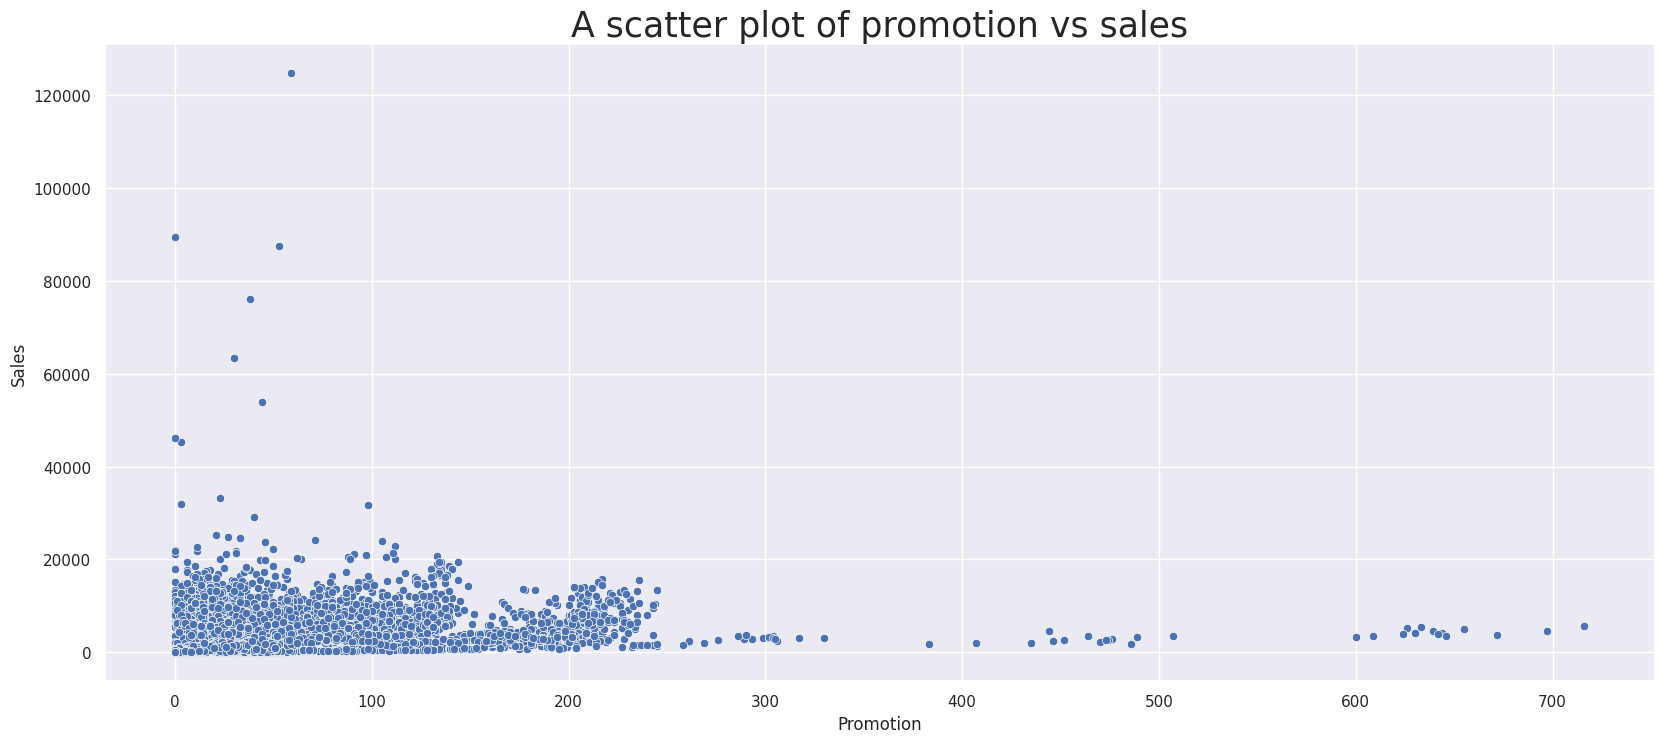

In [69]:
#creating a scatter plot of promotion vs sales
sns.scatterplot(x=train1['onpromotion'], y=train1['sales'], palette="viridis")
plt.xlabel('Promotion')
plt.ylabel('Sales')
plt.title('A scatter plot of promotion vs sales', fontsize=25)
plt.show()

Promotion is expected to have a positive effect on sales, from the plot above, promotion have very little effect on promotion.

<ipython-input-70-95ae0bfc0ec9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=train1['oil_price'], y=train1['sales'], palette="viridis")


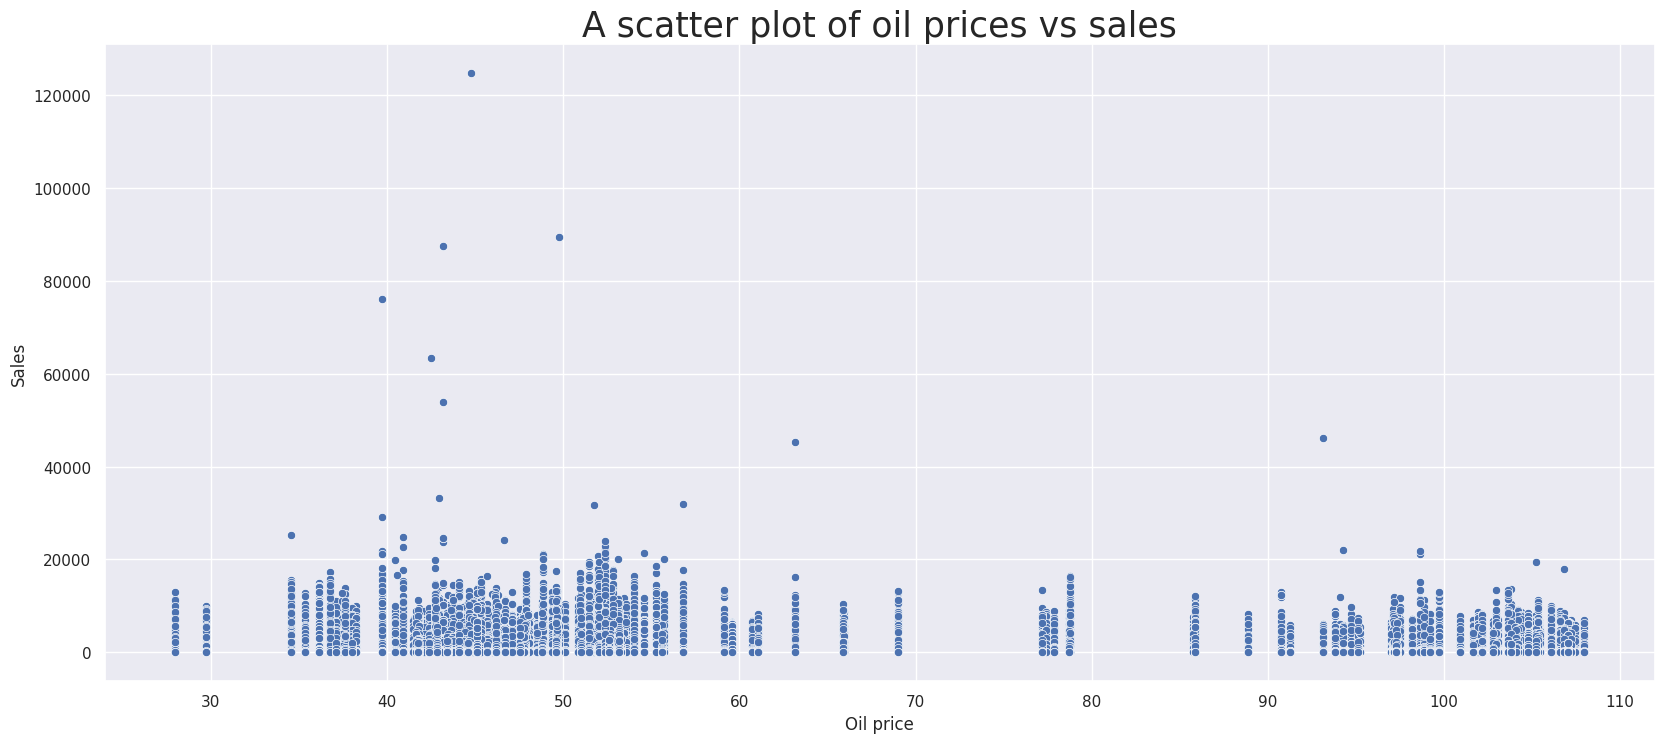

In [70]:
#creating a scatter plot of oil prices vs sales
sns.scatterplot(x=train1['oil_price'], y=train1['sales'], palette="viridis")
plt.xlabel('Oil price')
plt.ylabel('Sales')
plt.title('A scatter plot of oil prices vs sales', fontsize=25)
plt.show()

It can be observed that as oil price increases sale decrases. This indicate a inverse relationship between oil price and sales

<ipython-input-71-d37c5bbb6384>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=train1['holiday_type'], y=train1['sales'], palette="viridis")


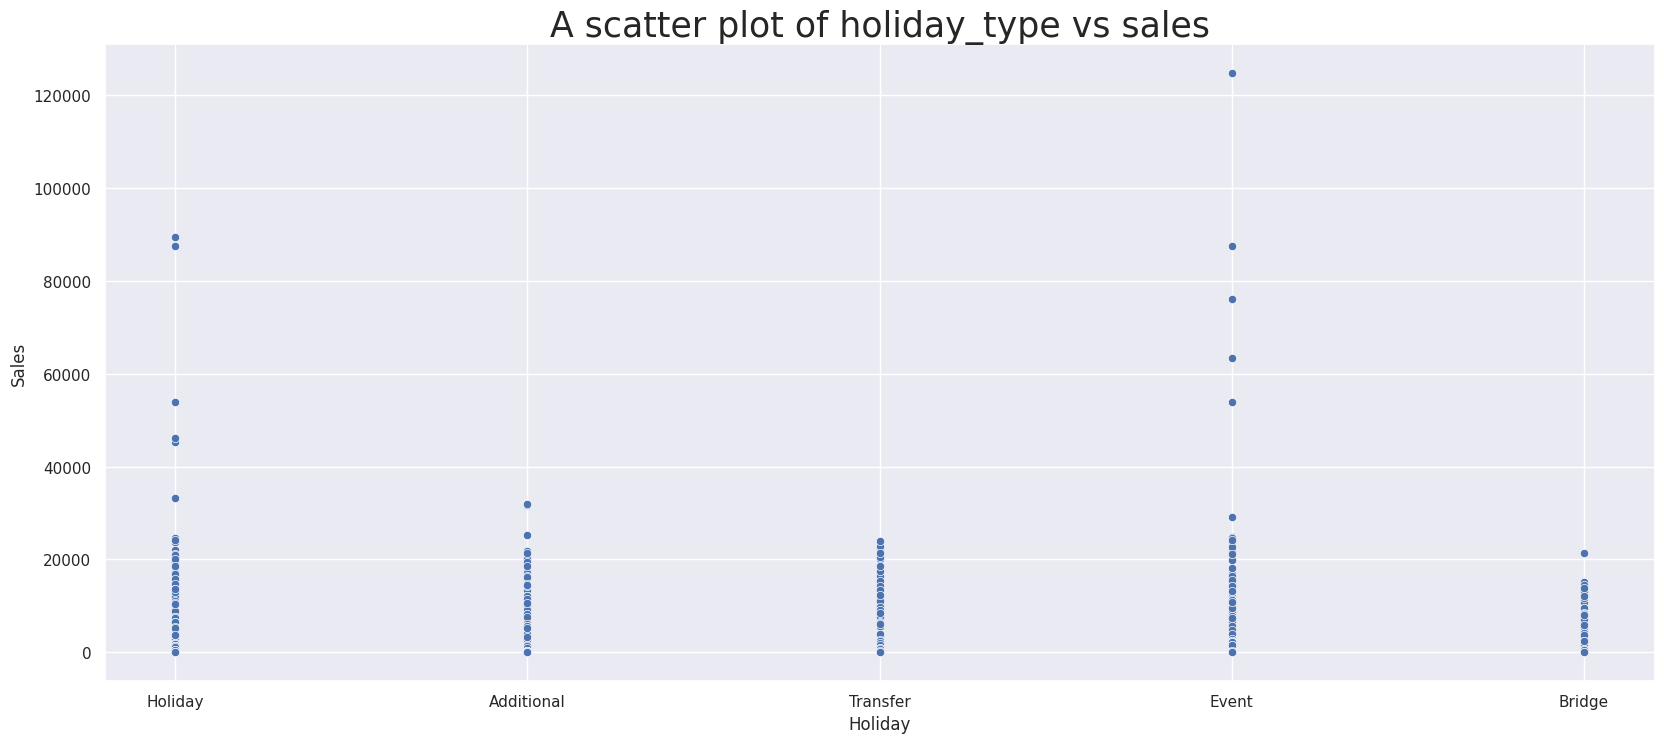

In [71]:
#creating a scatter plot of holiday_type vs sales
sns.scatterplot(x=train1['holiday_type'], y=train1['sales'], palette="viridis")
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.title('A scatter plot of holiday_type vs sales', fontsize=25)
plt.show()

Holidays have an impact on sales. Comparing Event days to holidays, Events days have more sales than holidays

# Question 5: What analysis can we get from the date and its extractable features?

### These are a few possible analysis that we can get from the data and it's extractable feature.
1. Temporal Analysis: Dates allow for temporal analysis, which involves understanding patterns, trends, and relationships over time. This analysis can help identify cyclical patterns, seasonality, historical trends, and other temporal aspects.

2. Trend Analysis: By analyzing a series of dates, you can identify and study trends over time. This can be useful for tracking changes in various domains such as sales, population, stock market, weather patterns, and more.

3. Seasonal Analysis: Dates can reveal seasonal patterns, such as monthly or yearly cycles. This analysis is valuable for businesses and industries affected by seasonal variations, such as retail, tourism, agriculture, and energy.

4. Event Analysis: Dates often correspond to specific events, such as holidays, conferences, product launches, or historical milestones. Analyzing the occurrence and impact of events can help identify their influence on various factors like sales, website traffic, social media engagement, and more.

5. Cohort Analysis: Dates can be used to group individuals or entities into cohorts based on specific time periods. Cohort analysis helps understand the behavior, characteristics, or performance of different groups over time. It is widely used in marketing, customer retention, and user engagement analysis.

6. Time Series Analysis: Dates form the foundation of time series data, which involves analyzing data points collected at regular intervals over time. Time series analysis enables forecasting, anomaly detection, and understanding the underlying patterns and dynamics of the data.

7. Age Calculation: By comparing dates, you can calculate age or time differences between events. This is useful in demographic analysis, population studies, actuarial science, and other fields where age-related insights are required.

8. Calendar Effects: Different calendars and cultural practices may impact various aspects of life, such as working days, holidays, and religious observances. Analyzing dates within specific calendar systems can help understand these effects.

8. Event Planning: Analyzing dates can assist in event planning by considering factors such as availability, conflicts, or historical attendance trends.


# Question 6: What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

RMSLE, MSE, RMSE, and MAE serve as error metrics utilized for assessing the performance of regression models.

- Mean Squared Error (MSE) quantifies the average squared difference between the predicted and actual values. It is computed by averaging the squared differences between the predicted and actual values. MSE assigns greater importance to larger errors and is sensitive to outliers.

- Root Mean Squared Error (RMSE) is the square root of MSE. It measures the average distance between the predicted and actual values. Since it is derived from the square root of MSE, RMSE shares the same units as the dependent variable. RMSE is sensitive to outliers and places more emphasis on larger errors.

- Root Mean Squared Logarithmic Error (RMSLE) resembles RMSE but involves taking the logarithm of the predicted and actual values before calculating the error. RMSLE is useful when the dependent variable spans a wide range of values and is skewed towards larger values. It exhibits less sensitivity to outliers compared to RMSE.

- Mean Absolute Error (MAE) gauges the average absolute difference between the predicted and actual values. It is computed by averaging the absolute differences between the predicted and actual values. MAE treats all errors equally, exhibits lower sensitivity to outliers, and remains unaffected by the scale of the dependent variable.

- MAE surpasses the others since it does not assign greater weight to larger errors, in contrast to MSE and RMSE. Thus, MAE may be more suitable when evaluating a model based on the magnitude of the errors rather than their squared values.

# HYPOTHESIS TESTING

### Effect of Promotions on Sales:

- NULL: There is a significant difference in sales between promoted and non-promoted items.

- ALTERNATIVE:There is no significant difference in sales between promoted and non-promoted items.

There is a significant difference in sales between promoted and non-promoted items.




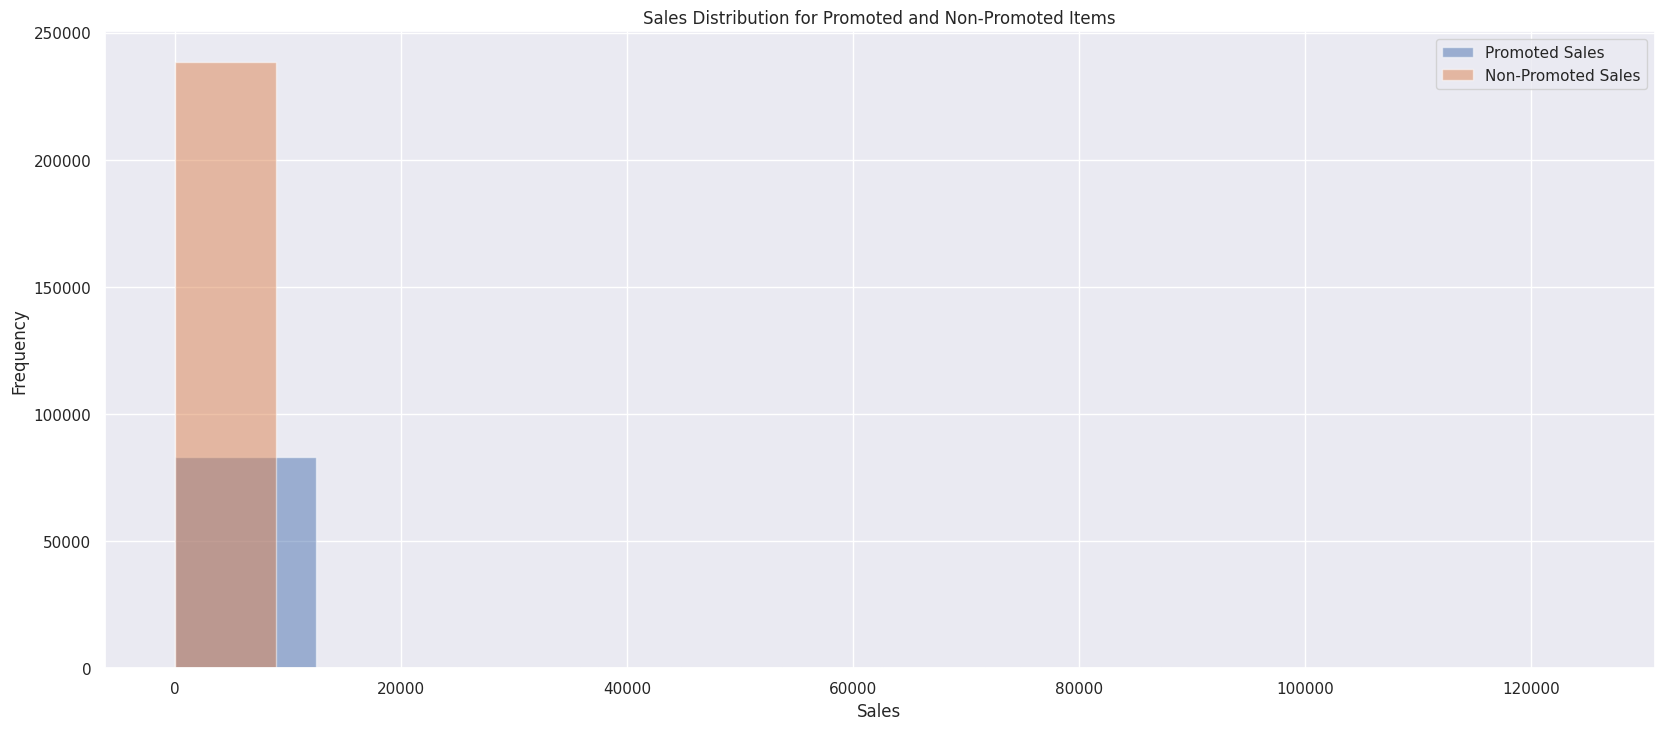

In [72]:
# Split the data into two groups based on promotion
promoted_sales = train1[train1['onpromotion'] > 0]['sales']
non_promoted_sales = train1[train1['onpromotion'] == 0]['sales']

# Perform t-test
t_stat, p_value = ttest_ind(promoted_sales, non_promoted_sales, equal_var=False)

# Print the results
if p_value < 0.05:
    print("There is a significant difference in sales between promoted and non-promoted items.")
else:
    print("There is no significant difference in sales between promoted and non-promoted items.")

print('\n')

# Plot the distribution of sales for promoted and non-promoted items
plt.hist(promoted_sales, alpha=0.5, label='Promoted Sales')
plt.hist(non_promoted_sales, alpha=0.5, label='Non-Promoted Sales')
plt.legend(loc='upper right')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution for Promoted and Non-Promoted Items')
plt.show()



```
`# This is formatted as code`
```

### Effect of Holidays on Sales:

- NULL:    There is a significant difference in sales between holiday and non-holiday days.
- ALTERNATIVE:  There is no significant difference in sales between holiday and non-holiday days.

There is no significant difference in sales between holiday and non-holiday days.




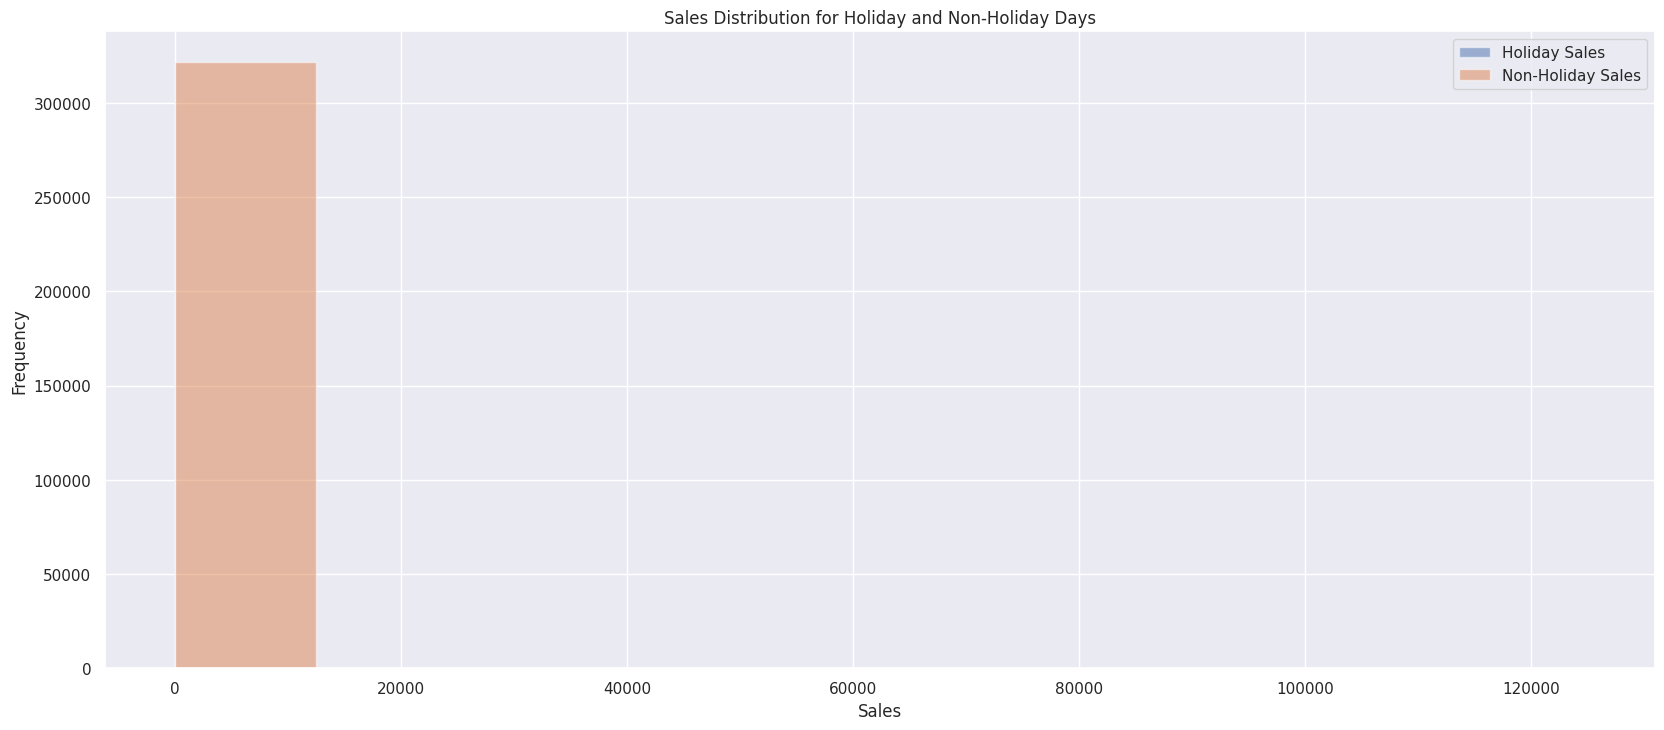

In [73]:
# Get the sales on holiday days
holiday_sales = train1[train1['date'].isin(holidays_events['date'])]['sales']

# Get the sales on non-holiday days
non_holiday_sales = train1[~train1['date'].isin(holidays_events['date'])]['sales']

# Perform t-test
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

# Print the results
if p_value < 0.05:
    print("There is a significant difference in sales between holiday and non-holiday days.")
else:
    print("There is no significant difference in sales between holiday and non-holiday days.")

print('\n')

# Plot the distribution of sales for holiday and non-holiday days
plt.hist(holiday_sales, alpha=0.5, label='Holiday Sales')
plt.hist(non_holiday_sales, alpha=0.5, label='Non-Holiday Sales')
plt.legend(loc='upper right')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution for Holiday and Non-Holiday Days')
plt.show()



```
`# This is formatted as code`

---


```

### Effect of Oil Prices on Sales:


- NULL:   There is a significant correlation between oil prices and sales.

- ALTERNATIVE:   There is no significant correlation between oil prices and sales.

There is a significant correlation between oil prices and sales.




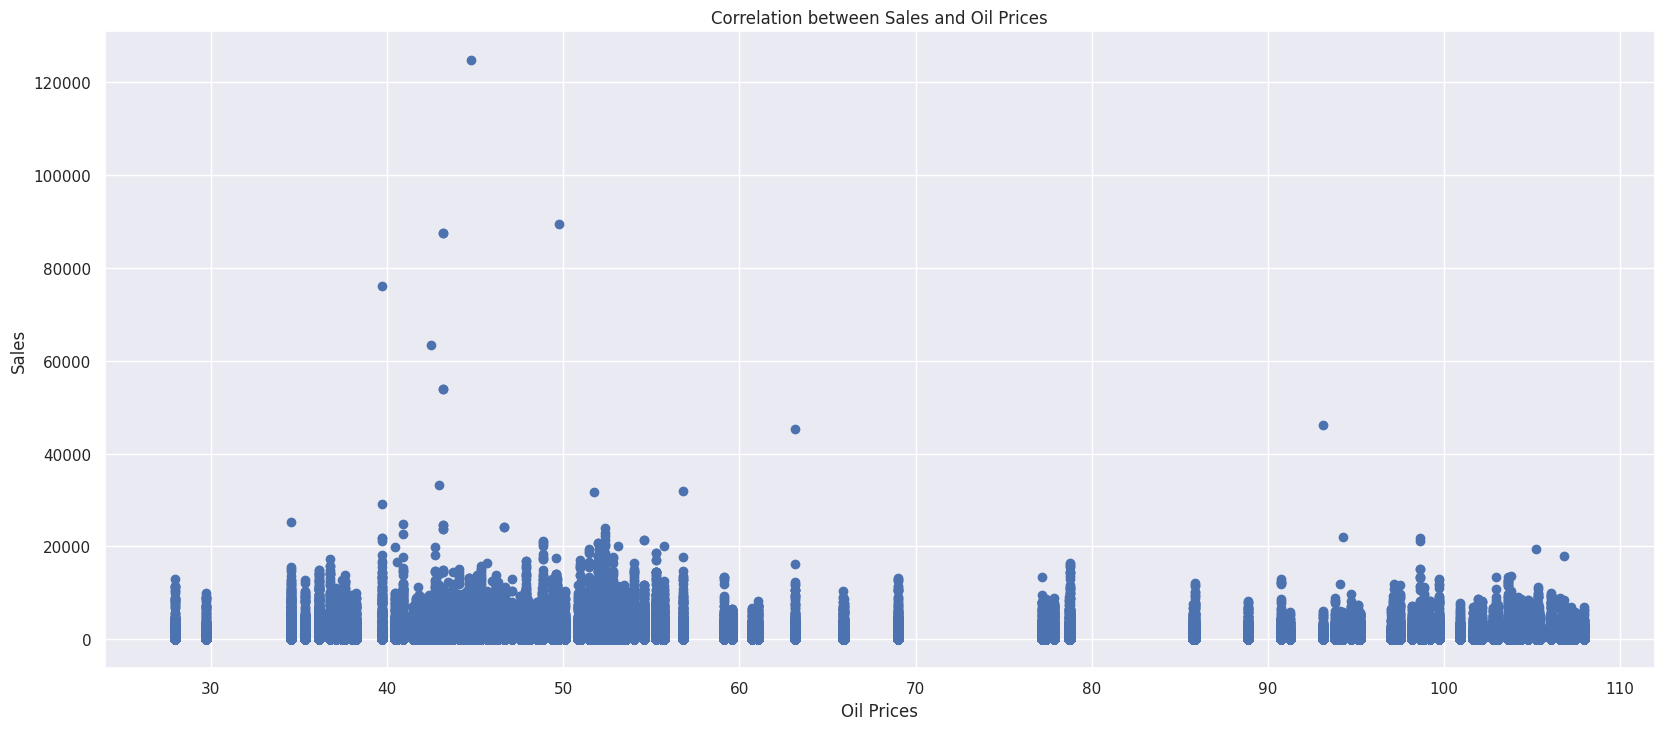

In [74]:
# Calculate correlation between sales and oil prices
correlation, p_value = pearsonr(train1['sales'], train1['oil_price'])

# Print the results
if p_value < 0.05:
    print("There is a significant correlation between oil prices and sales.")
else:
    print("There is no significant correlation between oil prices and sales.")

print('\n')

# Scatter plot of sales and oil prices
plt.scatter(train1['oil_price'], train1['sales'])
plt.xlabel('Oil Prices')
plt.ylabel('Sales')
plt.title('Correlation between Sales and Oil Prices')
plt.show()


### Effect of Payday on Sales:

- NULL:  There is a significant difference in sales between payday and non-payday days.

- ALTERNATIVE:  There is no significant difference in sales between payday and non-payday days.

There is no significant difference in sales between payday and non-payday days.




<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

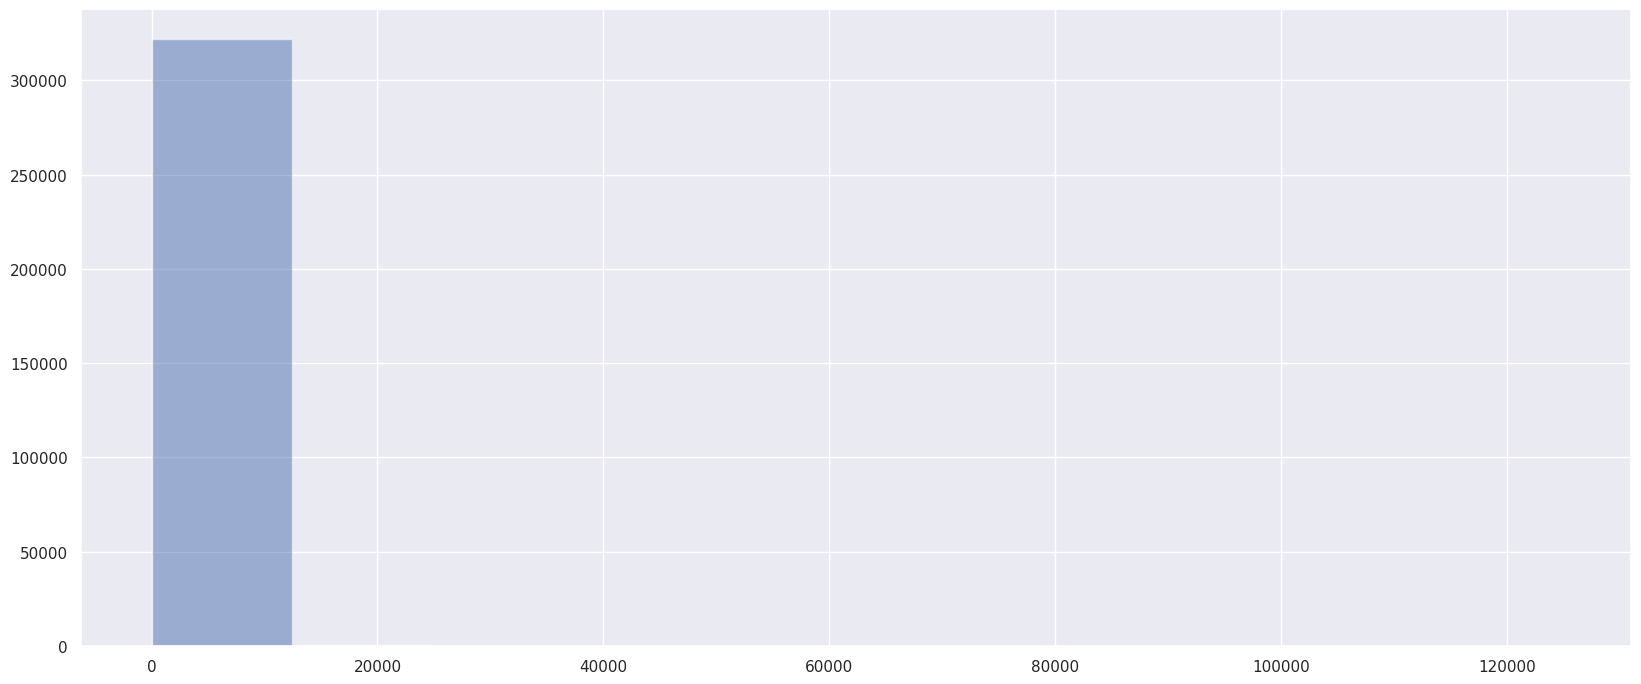

In [75]:
# Extract the day of the month from the date column
train1['day'] = pd.to_datetime(train1['date']).dt.day

# Split the data into two groups based on payday (15th and last day of the month)
payday_sales = train1[(train1['day'] == 15) | (train1['day'] == train1['day'].max())]['sales']
non_payday_sales = train1[(train1['day'] != 15) & (train1['day'] != train1['day'].max())]['sales']

# Perform t-test
t_stat, p_value = ttest_ind(payday_sales, non_payday_sales, equal_var=False)

# Print the results
if p_value < 0.05:
    print("There is a significant difference in sales between payday and non-payday days.")
else:
    print("There is no significant difference in sales between payday and non-payday days.")

print('\n')

# Plot the distribution of sales for payday and non-payday days
plt.hist(payday_sales, alpha=0.5, label='Payday Sales')
plt.hist(non_payday_sales, alpha=0.5, label='Non-Payday Sales')
plt


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [76]:
# Use pandas.DataFrame.drop_duplicates metho
#checking duplicates in the train data
new_merged_data.duplicated().sum()

0



```
# This is formatted as code
```

## New Features Creation

In [77]:
new_merged_data = train1

In [78]:
# Code here#change date datatype as datetime to create new features

new_merged_data.date = pd.to_datetime(new_merged_data.date)


new_merged_data['year'] = new_merged_data.date.dt.year

new_merged_data['month'] = new_merged_data.date.dt.month


new_merged_data['dayofmonth'] = new_merged_data.date.dt.day


new_merged_data['dayofweek'] = new_merged_data.date.dt.dayofweek


new_merged_data['dayname'] = new_merged_data.date.dt.strftime('%A')



In [79]:
# Preview data with new features
new_merged_data.head(15)

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,...,city,state,store_type,cluster,day,year,month,dayofmonth,dayofweek,dayname
0,561,1970-01-01 00:00:00.000002013,25,AUTOMOTIVE,0.000000,0,770,Holiday,National,Ecuador,...,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
1,562,1970-01-01 00:00:00.000002013,25,BABY CARE,0.000000,0,770,Holiday,National,Ecuador,...,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
2,563,1970-01-01 00:00:00.000002013,25,BEAUTY,2.000000,0,770,Holiday,National,Ecuador,...,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
3,564,1970-01-01 00:00:00.000002013,25,BEVERAGES,810.000000,0,770,Holiday,National,Ecuador,...,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
4,565,1970-01-01 00:00:00.000002013,25,BOOKS,0.000000,0,770,Holiday,National,Ecuador,...,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
5,566,1970-01-01 00:00:00.000002013,25,BREAD/BAKERY,180.589000,0,770,Holiday,National,Ecuador,...,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
6,567,1970-01-01 00:00:00.000002013,25,CELEBRATION,0.000000,0,770,Holiday,National,Ecuador,...,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
7,568,1970-01-01 00:00:00.000002013,25,CLEANING,186.000000,0,770,Holiday,National,Ecuador,...,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
8,569,1970-01-01 00:00:00.000002013,25,DAIRY,143.000000,0,770,Holiday,National,Ecuador,...,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
9,570,1970-01-01 00:00:00.000002013,25,DELI,71.090000,0,770,Holiday,National,Ecuador,...,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday


In [80]:
#drop unnecessary columns
final_data = new_merged_data.drop(columns=['id','locale', 'locale_name', 'description', 'transferred'], inplace=True)


In [81]:
new_merged_data.head()

,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,oil_price,city,state,store_type,cluster,day,year,month,dayofmonth,dayofweek,dayname
0,1970-01-01 00:00:00.000002013,25,AUTOMOTIVE,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
1,1970-01-01 00:00:00.000002013,25,BABY CARE,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
2,1970-01-01 00:00:00.000002013,25,BEAUTY,2.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
3,1970-01-01 00:00:00.000002013,25,BEVERAGES,810.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
4,1970-01-01 00:00:00.000002013,25,BOOKS,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday


In [82]:
# set the date column as the index
new_merged_data.set_index('date', inplace=True)

In [83]:
new_merged_data.head()

,store_nbr,family,sales,onpromotion,transactions,holiday_type,oil_price,city,state,store_type,cluster,day,year,month,dayofmonth,dayofweek,dayname
date,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002013,25,AUTOMOTIVE,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
1970-01-01 00:00:00.000002013,25,BABY CARE,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
1970-01-01 00:00:00.000002013,25,BEAUTY,2.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
1970-01-01 00:00:00.000002013,25,BEVERAGES,810.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday
1970-01-01 00:00:00.000002013,25,BOOKS,0.0,0,770,Holiday,93.14,Salinas,Santa Elena,D,1,1,1970,1,1,3,Thursday


In [84]:
# drop more columns

final_data = new_merged_data.drop(columns=['state',  'store_type', 'dayname'], inplace=True)

In [85]:
final_data = new_merged_data.copy()

In [86]:
final_data

,store_nbr,family,sales,onpromotion,transactions,holiday_type,oil_price,city,cluster,day,year,month,dayofmonth,dayofweek
date,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002013,25,AUTOMOTIVE,0.000,0,770,Holiday,93.14,Salinas,1,1,1970,1,1,3
1970-01-01 00:00:00.000002013,25,BABY CARE,0.000,0,770,Holiday,93.14,Salinas,1,1,1970,1,1,3
1970-01-01 00:00:00.000002013,25,BEAUTY,2.000,0,770,Holiday,93.14,Salinas,1,1,1970,1,1,3
1970-01-01 00:00:00.000002013,25,BEVERAGES,810.000,0,770,Holiday,93.14,Salinas,1,1,1970,1,1,3
1970-01-01 00:00:00.000002013,25,BOOKS,0.000,0,770,Holiday,93.14,Salinas,1,1,1970,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000002017,52,POULTRY,397.340,0,2255,Holiday,47.57,Manta,11,1,1970,1,1,3
1970-01-01 00:00:00.000002017,52,PREPARED FOODS,104.418,0,2255,Holiday,47.57,Manta,11,1,1970,1,1,3
1970-01-01 00:00:00.000002017,52,PRODUCE,3803.368,8,2255,Holiday,47.57,Manta,11,1,1970,1,1,3


In [87]:
#Rename dcoilwtico column to oil price
final_data.rename(columns={'dcoilwtico':'oil_price'}, inplace=True)

In [88]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 322047 entries, 1970-01-01 00:00:00.000002013 to 1970-01-01 00:00:00.000002017
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store_nbr     322047 non-null  int64  
 1   family        322047 non-null  object 
 2   sales         322047 non-null  float64
 3   onpromotion   322047 non-null  int64  
 4   transactions  322047 non-null  int64  
 5   holiday_type  322047 non-null  object 
 6   oil_price     322047 non-null  float64
 7   city          322047 non-null  object 
 8   cluster       322047 non-null  int64  
 9   day           322047 non-null  int64  
 10  year          322047 non-null  int64  
 11  month         322047 non-null  int64  
 12  dayofmonth    322047 non-null  int64  
 13  dayofweek     322047 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 36.9+ MB


In [89]:
final_data['store_nbr'].value_counts()

25    6402
47    6402
38    6402
1     6402
4     6402
40    6402
41    6402
43    6402
44    6402
45    6402
46    6402
48    6402
35    6402
49    6402
5     6402
50    6402
51    6402
54    6402
6     6402
7     6402
8     6402
9     6402
37    6402
39    6402
34    6402
23    6402
10    6402
11    6402
13    6402
15    6402
33    6402
17    6402
19    6402
2     6402
16    6402
31    6402
27    6402
28    6402
3     6402
26    6402
32    6402
14    6336
30    6303
36    6237
12    6204
18    6006
24    5742
53    5148
20    3828
29    3729
21    3300
42    3201
22    3102
52     429
Name: store_nbr, dtype: int64

In [90]:
print(final_data['store_nbr'].max())
print(final_data['store_nbr'].min())

54
1


In [91]:
final_data['cluster'].value_counts()

3     44715
10    35574
6     32736
15    31812
14    25608
13    24354
8     19206
4     19206
1     18546
11    13233
9     12804
2      9603
7      9438
5      6402
12     6402
17     6402
16     6006
Name: cluster, dtype: int64

In [92]:
final_data['city'].value_counts()

Quito            112266
Guayaquil         47784
Santo Domingo     16104
Cuenca            16005
Machala           12804
Ambato            12804
Latacunga         12606
Salinas            6402
Playas             6402
El Carmen          6402
Esmeraldas         6402
Loja               6402
Babahoyo           6402
Quevedo            6402
Daule              6402
Guaranda           6402
Ibarra             6402
Cayambe            6402
Riobamba           6336
Libertad           6237
Manta              5577
Puyo               3102
Name: city, dtype: int64

In [93]:
final_data['onpromotion'].value_counts()

0      238596
1       23351
2       10068
3        5900
4        4381
        ...  
330         1
232         1
697         1
289         1
716         1
Name: onpromotion, Length: 285, dtype: int64

In [94]:
print(final_data['onpromotion'].max())
print(final_data['onpromotion'].min())

716
0


In [95]:
final_data['transactions'].value_counts()

1304    561
1296    495
1248    495
875     462
1370    462
       ... 
3264     33
3927     33
4053     33
2746     33
3627     33
Name: transactions, Length: 3097, dtype: int64

In [96]:
print(final_data['transactions'].max())
print(final_data['transactions'].min())

8359
54


In [97]:
final_data['oil_price'].value_counts()

107.04    6204
59.59     4950
95.25     4653
45.11     3564
46.21     3531
          ... 
105.47    1518
104.05    1518
100.89    1518
95.14       66
93.14       33
Name: oil_price, Length: 173, dtype: int64

In [98]:
print(final_data['oil_price'].max())
print(final_data['oil_price'].min())

107.95
27.96


In [99]:
final_data['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [100]:
final_data['holiday_type'].unique()

array(['Holiday', 'Additional', 'Transfer', 'Event', 'Bridge'],
      dtype=object)

In [101]:
#final_data.to_parquet('final_data.parquet')
final_data.to_csv('final_data.csv')

## Features Encoding




In [102]:
# Select the categorical columns
categorical_columns = ["family", "city", "holiday_type"]
categorical_data = final_data[categorical_columns]
columns = list(final_data.columns)
print(columns)

['store_nbr', 'family', 'sales', 'onpromotion', 'transactions', 'holiday_type', 'oil_price', 'city', 'cluster', 'day', 'year', 'month', 'dayofmonth', 'dayofweek']


In [103]:
numerical_columns = [i for i in columns if i not in categorical_columns]

In [104]:
numerical_columns.remove('sales')
print(numerical_columns)

['store_nbr', 'onpromotion', 'transactions', 'oil_price', 'cluster', 'day', 'year', 'month', 'dayofmonth', 'dayofweek']


In [105]:
final_data[categorical_columns].info

<bound method DataFrame.info of                                                    family     city  \
date                                                                 
1970-01-01 00:00:00.000002013                  AUTOMOTIVE  Salinas   
1970-01-01 00:00:00.000002013                   BABY CARE  Salinas   
1970-01-01 00:00:00.000002013                      BEAUTY  Salinas   
1970-01-01 00:00:00.000002013                   BEVERAGES  Salinas   
1970-01-01 00:00:00.000002013                       BOOKS  Salinas   
...                                                   ...      ...   
1970-01-01 00:00:00.000002017                     POULTRY    Manta   
1970-01-01 00:00:00.000002017              PREPARED FOODS    Manta   
1970-01-01 00:00:00.000002017                     PRODUCE    Manta   
1970-01-01 00:00:00.000002017  SCHOOL AND OFFICE SUPPLIES    Manta   
1970-01-01 00:00:00.000002017                     SEAFOOD    Manta   

                              holiday_type  
date        

In [106]:
#from category_encoders.binary import BinaryEncoder
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [107]:
#binary_encoded = pd.DataFrame(columns=['column1', 'column2', 'column3'])

In [108]:
#ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
#ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
le_cat = LabelEncoder()

final_data['family'] = le_cat.fit_transform(final_data['family'])
final_data['holiday_type'] = le_cat.fit_transform(final_data['holiday_type'])
final_data['city'] = le_cat.fit_transform(final_data['city'])

In [109]:
#binary_encoded = pd.DataFrame(binary_encoded)
#binary_encoded

In [110]:
# Instantiate a BinaryEncoder transformer
#encoder = BinaryEncoder(drop_invariant=False, return_df=True,)

# Apply the encoder on the categorical data
#binary_encoded = encoder.fit(final_data[categorical_columns])

#binary_encoded

## Features Scaling


In [111]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.
from sklearn.preprocessing import StandardScaler

In [112]:
final_data[numerical_columns].head()

,store_nbr,onpromotion,transactions,oil_price,cluster,day,year,month,dayofmonth,dayofweek
date,,,,,,,,,,
1970-01-01 00:00:00.000002013,25,0,770,93.14,1,1,1970,1,1,3
1970-01-01 00:00:00.000002013,25,0,770,93.14,1,1,1970,1,1,3
1970-01-01 00:00:00.000002013,25,0,770,93.14,1,1,1970,1,1,3
1970-01-01 00:00:00.000002013,25,0,770,93.14,1,1,1970,1,1,3
1970-01-01 00:00:00.000002013,25,0,770,93.14,1,1,1970,1,1,3


In [113]:
# create an instance of StandardScaler
scalar = StandardScaler()

scalar.set_output(transform="pandas")
num_scalar = scalar
# fit and transform the numerical columns
scale_nums = num_scalar.fit(final_data[numerical_columns])
scale_nums

StandardScaler()

In [115]:
# transform the numerical and categorical columns
scale_nums = num_scalar.transform(final_data[numerical_columns])

#binary_encoded = encoder.transform(final_data[categorical_columns])


In [116]:
final_data_encoded = pd.concat([scale_nums, final_data['city'], final_data['family'], final_data['holiday_type'], final_data.sales], axis=1)

In [117]:
final_data_encoded.head()

,store_nbr,onpromotion,transactions,oil_price,cluster,day,year,month,dayofmonth,dayofweek,city,family,holiday_type,sales
date,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,0.0,0.0,0.0,0.0,0.0,20,0,3,0.0
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,0.0,0.0,0.0,0.0,0.0,20,1,3,0.0
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,0.0,0.0,0.0,0.0,0.0,20,2,3,2.0
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,0.0,0.0,0.0,0.0,0.0,20,3,3,810.0
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,0.0,0.0,0.0,0.0,0.0,20,4,3,0.0


In [118]:
# Make a copy of the final_data_encoded as data
data = final_data_encoded.copy()
data

,store_nbr,onpromotion,transactions,oil_price,cluster,day,year,month,dayofmonth,dayofweek,city,family,holiday_type,sales
date,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,0.0,0.0,0.0,0.0,0.0,20,0,3,0.000
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,0.0,0.0,0.0,0.0,0.0,20,1,3,0.000
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,0.0,0.0,0.0,0.0,0.0,20,2,3,2.000
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,0.0,0.0,0.0,0.0,0.0,20,3,3,810.000
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,0.0,0.0,0.0,0.0,0.0,20,4,3,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000002017,1.603404,-0.240273,0.495921,-0.646386,0.523738,0.0,0.0,0.0,0.0,0.0,14,28,3,397.340
1970-01-01 00:00:00.000002017,1.603404,-0.240273,0.495921,-0.646386,0.523738,0.0,0.0,0.0,0.0,0.0,14,29,3,104.418
1970-01-01 00:00:00.000002017,1.603404,0.275454,0.495921,-0.646386,0.523738,0.0,0.0,0.0,0.0,0.0,14,30,3,3803.368


## Dataset Splitting

In [119]:
# Split Data to train and Test


# Create the feature dataframe using the selected columns
X = data.drop(["sales"], axis=1)

# Get the target variable
y = data.sales

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}\n size of validation set: {}\n size of test set:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


Size of training set: 181151
 size of validation set: 60384
 size of test set: 80512



# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Create the Model

## Random Forest Regression Model

#### Train the Model

In [120]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make prediction on X_test
lr_predictions = lr.predict(X_valid)

# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_valid, lr_predictions).round(2)
lr_rmse = np.sqrt(lr_mse).round(2)

# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_valid)
lr_predictions_abs = abs(lr_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and lr_predictions_abs array
lr_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs)).round(2)


# Evaluate our models
mse = mean_squared_error(y_valid, lr_predictions)
msle = mean_squared_log_error(y_test_abs, lr_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_valid, lr_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs)).round(2)

results = pd.DataFrame([['Linear Regression', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results

,Model,MSE,MSLE,RMSE,RMSLE
0,Linear Regression,1.022577e+06,10.714362,1011.23,3.27


In [121]:
# Decision Tree Regression Model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make prediction on X_test
dt_predictions = dt.predict(X_valid)

# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_valid)
dt_predictions_abs = abs(dt_predictions)


# Evaluate our models
mse = mean_squared_error(y_valid, dt_predictions)
msle = mean_squared_log_error(y_test_abs, dt_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_valid, dt_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, dt_predictions_abs)).round(2)

model_results = pd.DataFrame([['Decision Tree', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-121-7e092ca1ea82>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,MSE,MSLE,RMSE,RMSLE
0,Linear Regression,1.022577e+06,10.714362,1011.23,3.27
1,Decision Tree,5.970300e+05,0.468803,772.68,0.68


In [122]:
# Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

# Make prediction on X_test
rf_predictions = rf.predict(X_valid)

#### Evaluation Metrics 

In [123]:
# Evaluation Metrics for Random Forest Regression
rf_mse = mean_squared_error(y_valid, rf_predictions).round(2)
rf_rmse = np.sqrt(rf_mse).round(2)
#rf_rmsle = np.sqrt(mean_squared_error(np.log(y_test), np.log(rf_predictions)))

In [124]:
# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_valid)
rf_predictions_abs = abs(rf_predictions)


In [125]:
# calculate the mean squared logarithmic error using the new y_test_abs and rf_predictions_abs array

rf_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs)).round(2)

In [126]:
# Evaluate our models
mse = mean_squared_error(y_valid, rf_predictions)
msle = mean_squared_log_error(y_test_abs, rf_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_valid, rf_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs)).round(2)

model_results = pd.DataFrame([['Random Forest', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-126-6e4c203a4eca>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,MSE,MSLE,RMSE,RMSLE
0,Linear Regression,1.022577e+06,10.714362,1011.23,3.27
1,Decision Tree,5.970300e+05,0.468803,772.68,0.68
2,Random Forest,1.857859e+05,0.359721,431.03,0.60


In [127]:
# XGBoost Model
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_valid)


# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_valid)
xgb_predictions_abs = abs(xgb_predictions)


# Evaluate our models
mse = mean_squared_error(y_valid, xgb_predictions)
msle = mean_squared_log_error(y_test_abs, xgb_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_valid, xgb_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, xgb_predictions_abs)).round(2)

model_results = pd.DataFrame([['XGBoost', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-127-2fb21e687809>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,MSE,MSLE,RMSE,RMSLE
0,Linear Regression,1.022577e+06,10.714362,1011.23,3.27
1,Decision Tree,5.970300e+05,0.468803,772.68,0.68
2,Random Forest,1.857859e+05,0.359721,431.03,0.60
3,XGBoost,1.152677e+05,3.168873,339.51,1.78


In [128]:
# Random Forest Regression Model
hg = GradientBoostingRegressor(n_estimators=100, random_state=42)
hg.fit(X_train, y_train)

# Make prediction on X_test
hg_predictions = hg.predict(X_valid)

# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_valid)
hg_predictions_abs = abs(hg_predictions)

# Evaluate our models
mse = mean_squared_error(y_valid, hg_predictions)
msle = mean_squared_log_error(y_test_abs, hg_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_valid, hg_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, hg_predictions_abs)).round(2)

model_results = pd.DataFrame([['Gradient Boost', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-128-9bc4f2517aa8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,MSE,MSLE,RMSE,RMSLE
0,Linear Regression,1.022577e+06,10.714362,1011.23,3.27
1,Decision Tree,5.970300e+05,0.468803,772.68,0.68
2,Random Forest,1.857859e+05,0.359721,431.03,0.60
3,XGBoost,1.152677e+05,3.168873,339.51,1.78
4,Gradient Boost,2.507805e+05,4.996118,500.78,2.24


In [129]:
# Random Forest Regression Model
sg = ExtraTreesRegressor(n_estimators=100, random_state=42)
sg.fit(X_train, y_train)

# Make prediction on X_test
sg_predictions = sg.predict(X_valid)

# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_valid)
sg_predictions_abs = abs(sg_predictions)

# Evaluate our models
mse = mean_squared_error(y_valid, sg_predictions)
msle = mean_squared_log_error(y_test_abs, sg_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_valid, sg_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, sg_predictions_abs)).round(2)

model_results = pd.DataFrame([['Extra Trees', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-129-1b8ab6b5e1e2>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,MSE,MSLE,RMSE,RMSLE
0,Linear Regression,1.022577e+06,10.714362,1011.23,3.27
1,Decision Tree,5.970300e+05,0.468803,772.68,0.68
2,Random Forest,1.857859e+05,0.359721,431.03,0.60
3,XGBoost,1.152677e+05,3.168873,339.51,1.78
4,Gradient Boost,2.507805e+05,4.996118,500.78,2.24
5,Extra Trees,1.025143e+05,0.540422,320.18,0.74


In [130]:
importance = pd.DataFrame({'feature':X.columns,'importance':np.round(rf.feature_importances_,3)})
importance = importance.sort_values('importance',ascending=False).set_index('feature')
importance.head(30)

,importance
feature,
family,0.341
onpromotion,0.269
transactions,0.247
oil_price,0.063
store_nbr,0.035
cluster,0.025
city,0.012
holiday_type,0.009
day,0.000


In [131]:
#X.drop('holiday_type', axis = 1, inplace = True)
X.drop('dayofmonth', axis = 1, inplace = True)
X.drop('month', axis = 1, inplace = True)
X.drop('year', axis = 1, inplace = True)
X.drop('day', axis = 1, inplace = True)
X.drop('dayofweek', axis = 1, inplace = True)
X.head()

,store_nbr,onpromotion,transactions,oil_price,cluster,city,family,holiday_type
date,,,,,,,,
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,20,0,3
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,20,1,3
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,20,2,3
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,20,3,3
1970-01-01 00:00:00.000002013,-0.127903,-0.240273,-0.917916,1.186995,-1.597692,20,4,3


In [132]:
y.head()

date
1970-01-01 00:00:00.000002013      0.0
1970-01-01 00:00:00.000002013      0.0
1970-01-01 00:00:00.000002013      2.0
1970-01-01 00:00:00.000002013    810.0
1970-01-01 00:00:00.000002013      0.0
Name: sales, dtype: float64

In [133]:
#from sklearn.ensemble import 
model = RandomForestRegressor(random_state=1)


# define grid search
grid = {
    'n_estimators': [1000],  # try different number of trees
    'max_depth': [1, 5, 10],       # try different maximum depth values
}
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='neg_mean_squared_error',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best Score:  %f using %s" % (grid_result.best_score_, grid_result.best_params_))

KeyboardInterrupt: ignored

In [135]:
# Random Forest Regression Model
rft = RandomForestRegressor(max_depth = 10, min_samples_split = 10, n_estimators = 100, random_state=42)
rft.fit(X_trainval, y_trainval)

# Make prediction on X_test
rf_predictions = rft.predict(X_test)

In [136]:
# Evaluation Metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_predictions).round(2)
rf_rmse = np.sqrt(rf_mse).round(2)

In [137]:
# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_test)
rf_predictions_abs = abs(rf_predictions)

In [138]:
# calculate the mean squared logarithmic error using the new y_test_abs and rf_predictions_abs array

rf_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs)).round(2)

In [139]:
# Evaluate our models
mse = mean_squared_error(y_test, rf_predictions)
msle = mean_squared_log_error(y_test_abs, rf_predictions_abs)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs)).round(2)

model_results = pd.DataFrame([['Random Forest', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
model_results

,Model,MSE,MSLE,RMSE,RMSLE
0,Random Forest,255686.200011,1.261172,505.65,1.12


In [143]:
# saving model

RF_Regressor = rft
data = {"model": RF_Regressor, 'num_scalar': num_scalar, 'le_cat':le_cat }
with open('store_sales_regressor.pkl', 'wb') as file:
    pickle.dump(data, file)


Best Score:  -388807.936316 using {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 1000}
	

  store_nbr	
  onpromotion	
  transactions	
  oil_price	
  cluster	
  city	
  family	
  holiday_type



 

In [141]:
#!pip install pipreqs

In [142]:
#!pip freeze > requirements.txt